In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline


### Part 1) Data Loading, understanding, cleaning up,  deriving new features & EDA

In [2]:
data = pd.read_csv('telecom_churn_data.csv')
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
data.shape

(99999, 226)

In [5]:
# checking for null values
data.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [6]:
# checking for null values in %
round(data.isnull().sum()/len(data.index)*100,2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [7]:
#Since columns with >70% (70,000) null values are not useful for us, lets' drop those columns
for col in data.columns:
    if data[col].isnull().sum() > 70000:
        data.drop(col, 1, inplace=True)

In [8]:
# checking the null values again sorted in descending order
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)
round(data.loc[:,data.isnull().any()].isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)

loc_og_t2m_mou_9        7.75
roam_ic_mou_9           7.75
loc_og_t2f_mou_9        7.75
loc_ic_t2m_mou_9        7.75
loc_ic_mou_9            7.75
std_og_t2f_mou_9        7.75
loc_og_t2c_mou_9        7.75
std_ic_t2t_mou_9        7.75
loc_ic_t2t_mou_9        7.75
loc_og_t2t_mou_9        7.75
std_ic_t2m_mou_9        7.75
og_others_9             7.75
std_ic_t2f_mou_9        7.75
roam_og_mou_9           7.75
loc_og_mou_9            7.75
spl_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
loc_ic_t2f_mou_9        7.75
onnet_mou_9             7.75
std_og_t2c_mou_9        7.75
std_og_t2t_mou_9        7.75
isd_og_mou_9            7.75
spl_ic_mou_9            7.75
ic_others_9             7.75
offnet_mou_9            7.75
std_og_t2m_mou_9        7.75
std_ic_mou_9            7.75
std_og_mou_9            7.75
isd_ic_mou_9            7.75
std_og_t2c_mou_8        5.38
loc_ic_t2m_mou_8        5.38
loc_og_t2c_mou_8        5.38
std_og_t2t_mou_8        5.38
std_og_mou_8            5.38
std_og_t2m_mou

In [9]:
# Renaming VBC data using standard format
data.rename(columns ={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=186)

In [10]:
# checking for duplicate data
data.duplicated(subset='mobile_number').sum()

0

In [11]:
# Adding new column for average recharge amount for good months
data['average_rech_amt_6+7']= data.loc[:, ['total_rech_amt_6', 'total_rech_amt_7']].astype('float').mean(axis=1)
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6          ...           sachet_3g_6  \
0  9/30/2014            197.385          ...           0             
1  9/30/2014            34.047           ...           0             
2  9/30/2014            167.690          ...           0             
3  9/30/2014            221.338          ...           0             
4  9/30/2014            261.636          ...           0             

   sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  \
0  0            0            0            968   30.4      0.0       101.20     
1  0            0            0            1006  0.0       0.0       0.00       
2  0            0            0            1103  0.0       0.0       4.17       
3  0            0            0            2491  0.0       0.0       0.00       
4  0            0            0            1526  0.0       0.0       0.00       

   vbc_3g_9  average_rech_amt_6+7  
0  3.58      307.0                 
1  0.00      229.0                 
2  0.00      241.5                 
3  0.00      270.0                 
4  0.00      273.0                 

[5 rows x 187 columns]

In [12]:
#identifying cut-off for 'good customers'
data['average_rech_amt_6+7'].describe(percentiles =[0.7])

count    99999.000000
mean     325.238792  
std      370.833466  
min      0.000000    
50%      229.000000  
70%      368.500000  
max      37762.500000
Name: average_rech_amt_6+7, dtype: float64

In [13]:
#filtering for good customers (70th percentile of the average recharge amount of the first 2 months) i.e. average recharge >=369
data_good_customers = data.loc[data['average_rech_amt_6+7']>= 369] 
data_good_customers.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  2.997900e+04   29979.0    29865.0         29865.0          
mean   7.001223e+09   109.0      0.0             0.0              
std    6.846594e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000641e+09   109.0      0.0             0.0              
50%    7.001232e+09   109.0      0.0             0.0              
75%    7.001814e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  29865.0         29979.000000  29979.000000  29979.000000  29979.000000   
mean   0.0             587.587624    589.424681    535.067748    488.869400     
std    0.0             442.848876    463.049067    492.447887    496.672348     
min    0.0            -2258.709000  -2014.045000  -945.808000   -1899.505000    
25%    0.0             364.352500    365.235000    289.782000    239.315500     
50%    0.0             495.951000    493.781000    452.232000    413.331000     
75%    0.0             704.184500    700.986000    671.349500    635.834000     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6          ...            sachet_3g_6   sachet_3g_7  \
count  29663.000000          ...           29979.000000  29979.000000   
mean   299.392147            ...           0.138063      0.150339       
std    462.369385            ...           0.875984      0.969779       
min    0.000000              ...           0.000000      0.000000       
25%    43.030000             ...           0.000000      0.000000       
50%    128.480000            ...           0.000000      0.000000       
75%    357.655000            ...           0.000000      0.000000       
max    7376.710000           ...           29.000000     35.000000      

        sachet_3g_8   sachet_3g_9           aon      vbc_3g_8      vbc_3g_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean   0.140498      0.136562      1264.158911   129.482436    135.225368     
std    0.975212      0.936843      975.181038    390.625027    408.218570     
min    0.000000      0.000000      180.000000    0.000000      0.000000       
25%    0.000000      0.000000      480.000000    0.000000      0.000000       
50%    0.000000      0.000000      914.000000    0.000000      0.000000       
75%    0.000000      0.000000      1923.500000   1.600000      2.025000       
max    41.000000     49.000000     4321.000000   12916.220000  9165.600000    

           vbc_3g_6      vbc_3g_9  average_rech_amt_6+7  
count  29979.000000  29979.000000  29979.000000          
mean   121.450911    6.554528      697.014644            
std    389.910814    48.630605     488.925223            
min    0.000000      0.000000      369.000000            
25%    0.000000      0.000000      450.000000            
50%    0.000000      0.000000      569.000000            
75%    0.000000      0.000000      796.000000            
max    11166.210000  2618.570000   37762.500000          

[8 rows x 179 columns]

In [14]:
data_good_customers.shape

(29979, 187)

In [15]:
# checking the null values again sorted in descending order
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)
round(data_good_customers.loc[:,data.isnull().any()].isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)

loc_ic_mou_9            1.70
std_ic_t2f_mou_9        1.70
std_ic_t2m_mou_9        1.70
loc_og_t2t_mou_9        1.70
std_ic_t2t_mou_9        1.70
loc_og_t2m_mou_9        1.70
loc_ic_t2f_mou_9        1.70
loc_og_t2f_mou_9        1.70
loc_ic_t2m_mou_9        1.70
loc_ic_t2t_mou_9        1.70
loc_og_t2c_mou_9        1.70
og_others_9             1.70
loc_og_mou_9            1.70
spl_og_mou_9            1.70
isd_og_mou_9            1.70
std_og_t2t_mou_9        1.70
std_og_mou_9            1.70
std_og_t2c_mou_9        1.70
std_og_t2m_mou_9        1.70
roam_og_mou_9           1.70
std_og_t2f_mou_9        1.70
std_ic_mou_9            1.70
onnet_mou_9             1.70
std_ic_t2o_mou_9        1.70
roam_ic_mou_9           1.70
offnet_mou_9            1.70
ic_others_9             1.70
spl_ic_mou_9            1.70
isd_ic_mou_9            1.70
offnet_mou_8            0.94
loc_ic_t2t_mou_8        0.94
isd_ic_mou_8            0.94
og_others_8             0.94
loc_og_mou_8            0.94
std_ic_t2o_mou

In [16]:
# since the NA data ranges from 0.03 % to 1.7%, we can drop these rows as they are of no use to us
data_good_customers = data_good_customers.dropna(axis=0)
data_good_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
8   7001524846     109        0.0             0.0             0.0              
13  7002191713     109        0.0             0.0             0.0              
16  7000875565     109        0.0             0.0             0.0              
17  7000187447     109        0.0             0.0             0.0              
21  7002124215     109        0.0             0.0             0.0              

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
8   6/30/2014            7/31/2014            8/31/2014             
13  6/30/2014            7/31/2014            8/31/2014             
16  6/30/2014            7/31/2014            8/31/2014             
17  6/30/2014            7/31/2014            8/31/2014             
21  6/30/2014            7/31/2014            8/31/2014             

   last_date_of_month_9   arpu_6          ...           sachet_3g_6  \
8   9/30/2014            378.721          ...           0             
13  9/30/2014            492.846          ...           0             
16  9/30/2014            430.975          ...           0             
17  9/30/2014            690.008          ...           0             
21  9/30/2014            514.453          ...           0             

    sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  \
8   0            0            0            315   21.03     910.65    122.16     
13  0            0            0            2607  0.00      0.00      0.00       
16  0            0            0            511   0.00      2.45      21.89      
17  0            0            0            667   0.00      0.00      0.00       
21  0            0            0            720   0.00      0.00      0.00       

    vbc_3g_9  average_rech_amt_6+7  
8   0.0       519.0                 
13  0.0       380.0                 
16  0.0       459.0                 
17  0.0       408.0                 
21  0.0       640.0                 

[5 rows x 187 columns]

In [17]:
data_good_customers.shape

(27387, 187)

In [18]:
data_good_customers.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  2.738700e+04   27387.0    27387.0         27387.0          
mean   7.001230e+09   109.0      0.0             0.0              
std    6.798052e+05   0.0        0.0             0.0              
min    7.000000e+09   109.0      0.0             0.0              
25%    7.000655e+09   109.0      0.0             0.0              
50%    7.001244e+09   109.0      0.0             0.0              
75%    7.001814e+09   109.0      0.0             0.0              
max    7.002411e+09   109.0      0.0             0.0              

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count  27387.0         27387.000000  27387.000000  27387.000000  27387.000000   
mean   0.0             584.379317    596.699749    560.718871    522.452936     
std    0.0             428.548910    454.623978    489.863063    492.974821     
min    0.0            -810.661000   -622.509000   -345.129000   -1474.195000    
25%    0.0             365.522500    372.506500    319.010500    278.878500     
50%    0.0             493.218000    498.477000    470.684000    438.810000     
75%    0.0             696.026500    704.514500    689.193500    657.019000     
max    0.0             27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6          ...            sachet_3g_6   sachet_3g_7  \
count  27387.000000          ...           27387.000000  27387.000000   
mean   295.805851            ...           0.139044      0.152810       
std    454.957884            ...           0.873520      0.959402       
min    0.000000              ...           0.000000      0.000000       
25%    44.010000             ...           0.000000      0.000000       
50%    129.090000            ...           0.000000      0.000000       
75%    354.745000            ...           0.000000      0.000000       
max    7376.710000           ...           29.000000     33.000000      

        sachet_3g_8   sachet_3g_9           aon      vbc_3g_8      vbc_3g_7  \
count  27387.000000  27387.000000  27387.000000  27387.000000  27387.000000   
mean   0.150290      0.146748      1291.934567   135.369713    137.691370     
std    1.009764      0.973077      979.120783    397.294644    411.917513     
min    0.000000      0.000000      180.000000    0.000000      0.000000       
25%    0.000000      0.000000      487.000000    0.000000      0.000000       
50%    0.000000      0.000000      951.000000    0.000000      0.000000       
75%    0.000000      0.000000      1983.000000   11.750000     5.075000       
max    41.000000     49.000000     4321.000000   12916.220000  9165.600000    

           vbc_3g_6      vbc_3g_9  average_rech_amt_6+7  
count  27387.000000  27387.000000  27387.000000          
mean   121.926816    7.038720      698.005879            
std    387.591462    50.372738     489.975921            
min    0.000000      0.000000      369.000000            
25%    0.000000      0.000000      451.000000            
50%    0.000000      0.000000      571.000000            
75%    0.000000      0.000000      799.000000            
max    11166.210000  2618.570000   37762.500000          

[8 rows x 179 columns]

In [19]:
# Tagging customers as Churn(1) or Not Churn(0)
data_good_customers['total_usage_calls+data_9'] = data_good_customers['total_ic_mou_9']+ data_good_customers['total_og_mou_9']+ data_good_customers['vol_2g_mb_9']+data_good_customers['vol_3g_mb_9']
data_good_customers['Churn'] = data_good_customers['total_usage_calls+data_9'].apply(lambda x: '1' if x==0 else '0')
data_good_customers.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
8   7001524846     109        0.0             0.0             0.0              
13  7002191713     109        0.0             0.0             0.0              
16  7000875565     109        0.0             0.0             0.0              
17  7000187447     109        0.0             0.0             0.0              
21  7002124215     109        0.0             0.0             0.0              

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
8   6/30/2014            7/31/2014            8/31/2014             
13  6/30/2014            7/31/2014            8/31/2014             
16  6/30/2014            7/31/2014            8/31/2014             
17  6/30/2014            7/31/2014            8/31/2014             
21  6/30/2014            7/31/2014            8/31/2014             

   last_date_of_month_9   arpu_6  ...    sachet_3g_8  sachet_3g_9   aon  \
8   9/30/2014            378.721  ...    0            0            315    
13  9/30/2014            492.846  ...    0            0            2607   
16  9/30/2014            430.975  ...    0            0            511    
17  9/30/2014            690.008  ...    0            0            667    
21  9/30/2014            514.453  ...    0            0            720    

    vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  average_rech_amt_6+7  \
8   21.03     910.65    122.16    0.0       519.0                  
13  0.00      0.00      0.00      0.0       380.0                  
16  0.00      2.45      21.89     0.0       459.0                  
17  0.00      0.00      0.00      0.0       408.0                  
21  0.00      0.00      0.00      0.0       640.0                  

    total_usage_calls+data_9  Churn  
8   177.09                    0      
13  1077.95                   0      
16  590.30                    0      
17  718.21                    0      
21  1284.14                   0      

[5 rows x 189 columns]

In [20]:
# Understanding class imbalance and churn %
data_good_customers['Churn']= data_good_customers['Churn'].convert_objects(convert_numeric=True)
print(data_good_customers['Churn'].astype('category').value_counts())
churn = (data_good_customers['Churn'].astype('int').sum())/(len(data_good_customers['Churn'].index))*100
print(churn)

0    26479
1    908  
Name: Churn, dtype: int64
3.3154416328915177


In [21]:
data_good_customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27387 entries, 8 to 99997
Data columns (total 189 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [22]:
#Creating a new DF for data which does not contain month 4 (Sep)
data_final = data_good_customers[data_good_customers.columns.drop(list(data_good_customers.filter(regex='9')))]
data_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27387 entries, 8 to 99997
Data columns (total 143 columns):
mobile_number           int64
circle_id               int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
l

In [23]:
# Deriving columns for Average re-charge value per month
data_final['Avg_recharge_value_6'] = data_final['total_rech_amt_6']/data_final['total_rech_num_6']
data_final['Avg_recharge_value_7'] = data_final['total_rech_amt_7']/data_final['total_rech_num_7']
data_final['Avg_recharge_value_8'] = data_final['total_rech_amt_8']/data_final['total_rech_num_8']

In [24]:
#Dropping Mobile number & Circle id from the Data
data_final = data_final.drop(['mobile_number', 'circle_id'], axis=1)
data_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27387 entries, 8 to 99997
Data columns (total 144 columns):
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
loc_og_t2t_mou_6        float64
loc_og_t2t_mou_7        float64
loc_og_t2t_mou_8        float64
loc_og_t2m_mou_6        float64
loc_og_t2m_mou_7        float64
loc_og_t2m_mou_8        float64
loc_og_t2f_mou_6        float

In [25]:
# Dropping all the columns which are only 0s
data_final = data_final.loc[:, (data_final != 0).any(axis=0)]
data_final

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
8      6/30/2014            7/31/2014            8/31/2014             
13     6/30/2014            7/31/2014            8/31/2014             
16     6/30/2014            7/31/2014            8/31/2014             
17     6/30/2014            7/31/2014            8/31/2014             
21     6/30/2014            7/31/2014            8/31/2014             
24     6/30/2014            7/31/2014            8/31/2014             
33     6/30/2014            7/31/2014            8/31/2014             
38     6/30/2014            7/31/2014            8/31/2014             
41     6/30/2014            7/31/2014            8/31/2014             
48     6/30/2014            7/31/2014            8/31/2014             
53     6/30/2014            7/31/2014            8/31/2014             
56     6/30/2014            7/31/2014            8/31/2014             
57     6/30/2014            7/31/2014            8/31/2014             
60     6/30/2014            7/31/2014            8/31/2014             
61     6/30/2014            7/31/2014            8/31/2014             
69     6/30/2014            7/31/2014            8/31/2014             
73     6/30/2014            7/31/2014            8/31/2014             
74     6/30/2014            7/31/2014            8/31/2014             
87     6/30/2014            7/31/2014            8/31/2014             
92     6/30/2014            7/31/2014            8/31/2014             
96     6/30/2014            7/31/2014            8/31/2014             
101    6/30/2014            7/31/2014            8/31/2014             
102    6/30/2014            7/31/2014            8/31/2014             
103    6/30/2014            7/31/2014            8/31/2014             
105    6/30/2014            7/31/2014            8/31/2014             
115    6/30/2014            7/31/2014            8/31/2014             
122    6/30/2014            7/31/2014            8/31/2014             
124    6/30/2014            7/31/2014            8/31/2014             
131    6/30/2014            7/31/2014            8/31/2014             
133    6/30/2014            7/31/2014            8/31/2014             
134    6/30/2014            7/31/2014            8/31/2014             
146    6/30/2014            7/31/2014            8/31/2014             
147    6/30/2014            7/31/2014            8/31/2014             
149    6/30/2014            7/31/2014            8/31/2014             
154    6/30/2014            7/31/2014            8/31/2014             
157    6/30/2014            7/31/2014            8/31/2014             
158    6/30/2014            7/31/2014            8/31/2014             
165    6/30/2014            7/31/2014            8/31/2014             
170    6/30/2014            7/31/2014            8/31/2014             
171    6/30/2014            7/31/2014            8/31/2014             
173    6/30/2014            7/31/2014            8/31/2014             
175    6/30/2014            7/31/2014            8/31/2014             
176    6/30/2014            7/31/2014            8/31/2014             
177    6/30/2014            7/31/2014            8/31/2014             
184    6/30/2014            7/31/2014            8/31/2014             
185    6/30/2014            7/31/2014            8/31/2014             
195    6/30/2014            7/31/2014            8/31/2014             
199    6/30/2014            7/31/2014            8/31/2014             
203    6/30/2014            7/31/2014            8/31/2014             
204    6/30/2014            7/31/2014            8/31/2014             
206    6/30/2014            7/31/2014            8/31/2014             
208    6/30/2014            7/31/2014            8/31/2014             
213    6/30/2014            7/31/2014            8/31/2014             
218    6/30/2014            7/31/2014            8/31/2014             
223    6/30/2014            7/31/2014         

In [26]:
# looking at co-relation of various attributes
corrmat = data_final.corr()
corrmat

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                1.000000  0.717767  0.653508  0.294373     0.161961      
arpu_7                0.717767  1.000000  0.779930  0.155684     0.268003      
arpu_8                0.653508  0.779930  1.000000  0.108886     0.184670      
onnet_mou_6           0.294373  0.155684  0.108886  1.000000     0.746545      
onnet_mou_7           0.161961  0.268003  0.184670  0.746545     1.000000      
onnet_mou_8           0.139120  0.218557  0.297367  0.626977     0.806534      
offnet_mou_6          0.477049  0.307616  0.242067 -0.000810    -0.035037      
offnet_mou_7          0.294943  0.445721  0.330648 -0.052160    -0.007756      
offnet_mou_8          0.254236  0.352268  0.479042 -0.042513    -0.008095      
roam_ic_mou_6         0.101880  0.080944  0.081042  0.002410     0.023650      
roam_ic_mou_7         0.075079  0.081457  0.068197  0.012133    -0.006692      
roam_ic_mou_8         0.087016  0.084316  0.096679  0.033346     0.022904      
roam_og_mou_6         0.170248  0.118269  0.122337  0.047056     0.061771      
roam_og_mou_7         0.129767  0.161048  0.125159  0.054767     0.044254      
roam_og_mou_8         0.119519  0.141541  0.185132  0.061697     0.068087      
loc_og_t2t_mou_6      0.133608  0.068434  0.066769  0.449932     0.336505      
loc_og_t2t_mou_7      0.095597  0.118568  0.094379  0.349545     0.457663      
loc_og_t2t_mou_8      0.096613  0.099502  0.139302  0.310145     0.372041      
loc_og_t2m_mou_6      0.290680  0.160918  0.163191 -0.042867    -0.083848      
loc_og_t2m_mou_7      0.199997  0.243045  0.209444 -0.079078    -0.071157      
loc_og_t2m_mou_8      0.185980  0.200034  0.295286 -0.078421    -0.075813      
loc_og_t2f_mou_6      0.117815  0.086913  0.094679 -0.064803    -0.074395      
loc_og_t2f_mou_7      0.090427  0.110127  0.105208 -0.073018    -0.070942      
loc_og_t2f_mou_8      0.085481  0.094207  0.125536 -0.070880    -0.070318      
loc_og_t2c_mou_6      0.038529  0.004568 -0.001614  0.039397     0.026350      
loc_og_t2c_mou_7      0.003746  0.036104  0.014894  0.024131     0.053615      
loc_og_t2c_mou_8      0.005065  0.028890  0.045427  0.036841     0.057533      
loc_og_mou_6          0.280919  0.153265  0.154147  0.250678     0.152096      
loc_og_mou_7          0.196223  0.240081  0.202250  0.180381     0.258131      
loc_og_mou_8          0.186073  0.197379  0.285662  0.148793     0.190911      
std_og_t2t_mou_6      0.236697  0.123859  0.071154  0.845445     0.626407      
std_og_t2t_mou_7      0.115753  0.219657  0.142324  0.621980     0.844857      
std_og_t2t_mou_8      0.091898  0.177602  0.239582  0.518420     0.684749      
std_og_t2m_mou_6      0.266276  0.167992  0.093348  0.031432     0.015396      
std_og_t2m_mou_7      0.140044  0.270085  0.172042 -0.008497     0.035635      
std_og_t2m_mou_8      0.108870  0.204951  0.286772 -0.002101     0.034241      
std_og_t2f_mou_6      0.053877  0.041818  0.042249 -0.038942    -0.043510      
std_og_t2f_mou_7      0.040597  0.057486  0.053754 -0.040251    -0.036358      
std_og_t2f_mou_8      0.031329  0.037836  0.052938 -0.042161    -0.041524      
std_og_mou_6          0.342767  0.199083  0.112606  0.595709     0.435713      
std_og_mou_7          0.174809  0.334281  0.214916  0.411230     0.591374      
std_og_mou_8          0.135931  0.258565  0.355824  0.344447     0.480348      
isd_og_mou_6          0.482143  0.467769  0.435657 -0.016732    -0.015674      
isd_og_mou_7          0.471463  0.522238  0.464887 -0.018503    -0.017158      
isd_og_mou_8          0.460243  0.484357  0.474323 -0.017729    -0.016314      
spl_og_mou_6          0.108528  0.061605  0.099706  0.077058     0.053300      
spl_og_mou_7          0.050689  0.096639  0.109701  0.059807     0.104907      
spl_og_mou_8          0.027415  0.048194  0.076117  0.065131     0.095741      
og_others_6           0.082371  0.025610  0.020419  0.082562     0.041597      
og_others_7           0.

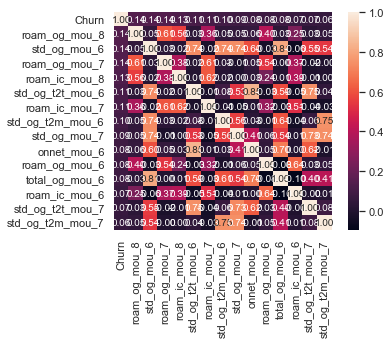

<Figure size 2160x1440 with 0 Axes>

In [27]:
#Heatmap of the Top 15 variables with Churn
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(data_final[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.figure(figsize=(30,20))
plt.show()

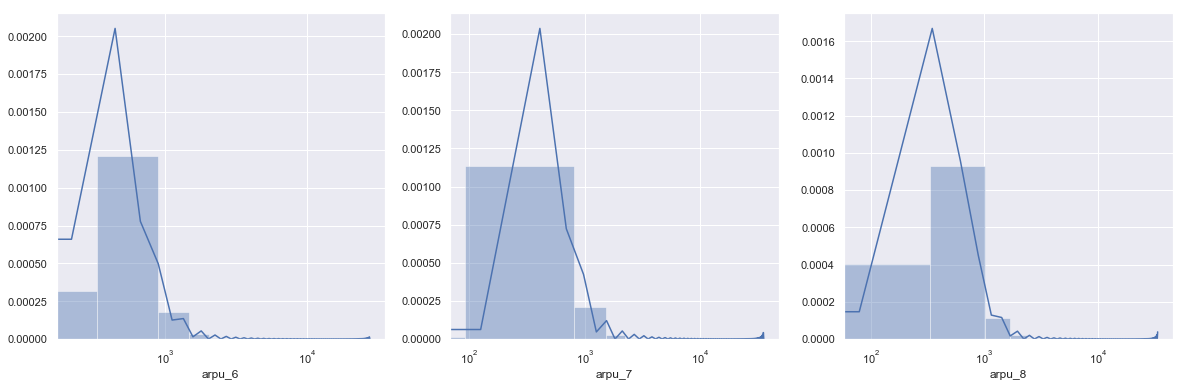

In [28]:
# Data visualization on some key variables - Distplot on ARPU

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.xscale('log')
sns.distplot(data_final['arpu_6'])
plt.subplot(1,3,2)
plt.xscale('log')
sns.distplot(data_final['arpu_7'])
plt.subplot(1,3,3)
plt.xscale('log')
sns.distplot(data_final['arpu_8'])

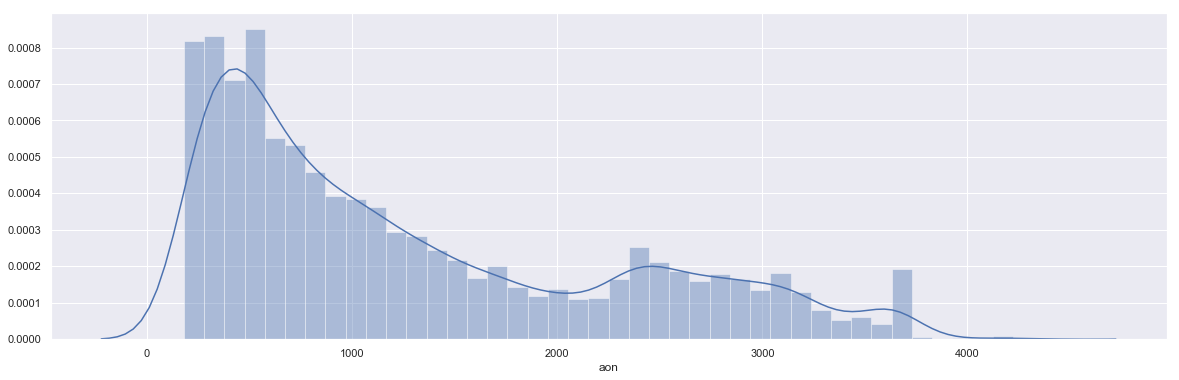

In [29]:
# Distplot on AON
plt.figure(figsize=(20,6))
sns.distplot(data_final['aon'])

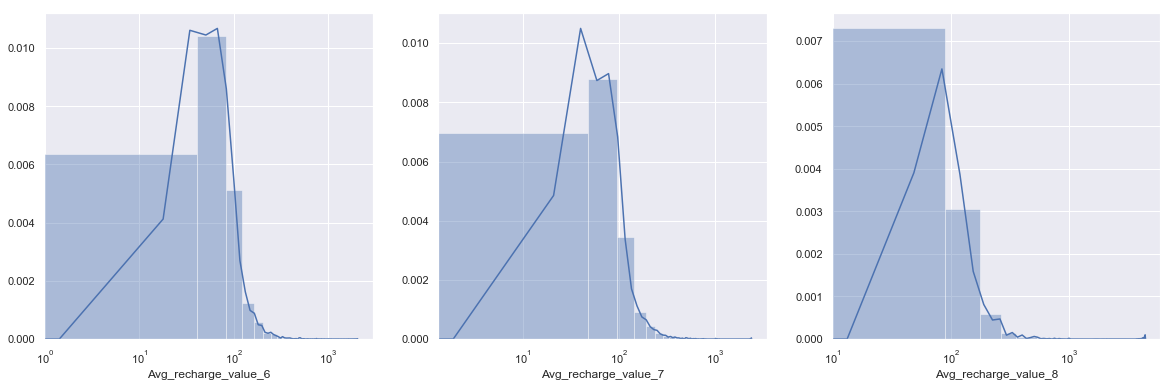

In [30]:
# Distplot on Avg recharge value
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.xscale('log')
sns.distplot(data_final['Avg_recharge_value_6'])
plt.subplot(1,3,2)
plt.xscale('log')
sns.distplot(data_final['Avg_recharge_value_7'])
plt.subplot(1,3,3)
plt.xscale('log')
sns.distplot(data_final['Avg_recharge_value_8'])

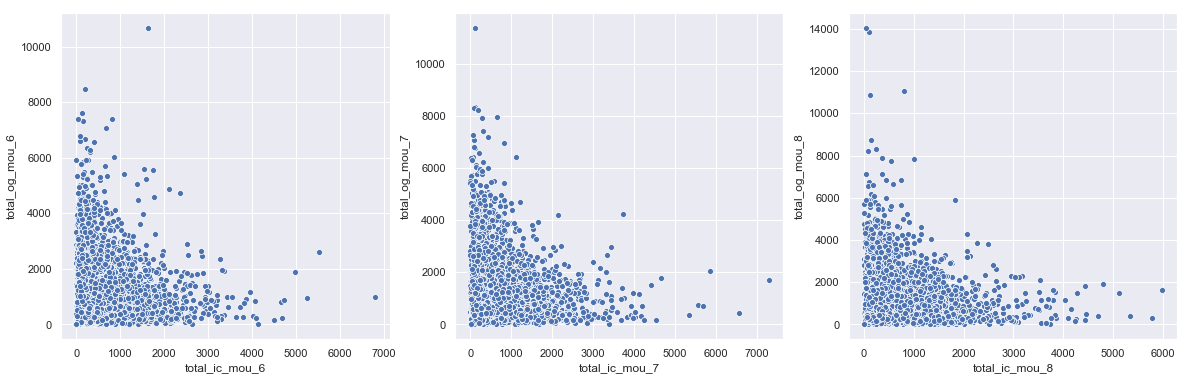

In [31]:
# Scatterplot on IC MOU vs OG mou
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='total_ic_mou_6',y='total_og_mou_6', data=data_final)
plt.subplot(1,3,2)
sns.scatterplot(x='total_ic_mou_7',y='total_og_mou_7', data=data_final)
plt.subplot(1,3,3)
sns.scatterplot(x='total_ic_mou_8',y='total_og_mou_8', data=data_final)

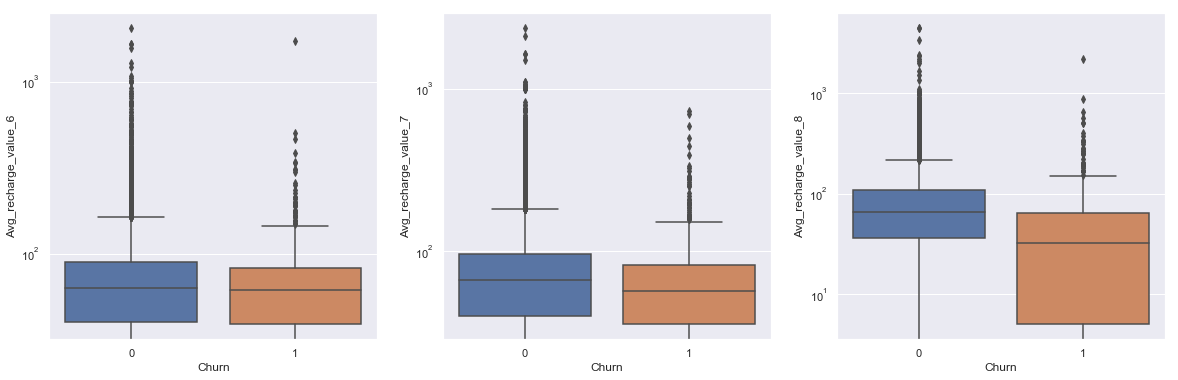

In [32]:
# Boxplot on Churn vs Avg Recharge value
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.yscale('log')
sns.boxplot(x=data_final['Churn'], y= data_final['Avg_recharge_value_6'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.boxplot(x=data_final['Churn'], y= data_final['Avg_recharge_value_7'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.boxplot(x=data_final['Churn'], y= data_final['Avg_recharge_value_8'])

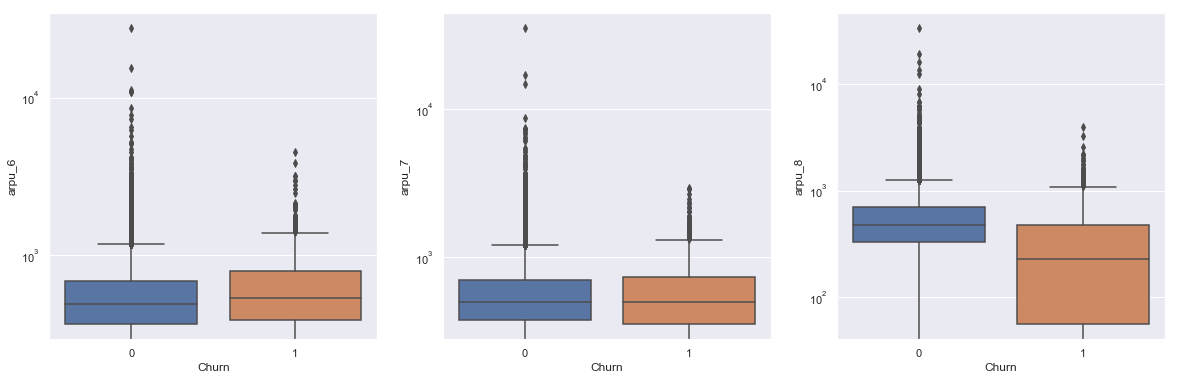

In [33]:
# Boxplot on Churn vs ARPU vs Churn
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.yscale('log')
sns.boxplot(x=data_final['Churn'], y= data_final['arpu_6'])
plt.subplot(1,3,2)
plt.yscale('log')
sns.boxplot(x=data_final['Churn'], y= data_final['arpu_7'])
plt.subplot(1,3,3)
plt.yscale('log')
sns.boxplot(x=data_final['Churn'], y= data_final['arpu_8'])

### Part 2) PCA

#### As we can see from heatmap and co-relation data, there is a lot of multi colinearity between features. Hence, we can do PCA to reduce the number of features

In [34]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [35]:
# Dropping date columns as they are not relevant for PCA
data_final1 = data_final.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)

In [36]:
# Creating train test split
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data_final1.drop(['Churn'],axis=1)

# Putting response variable to y
y = data_final1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [37]:
#we observe that a lot of the data variables are of different orders of magnitude. 
#Let's do rescaling so that PCA can be applied.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(X_train)

In [38]:
#Doing the PCA on the data
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [39]:
# Consolidating the various PCs
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8]})
pca_df

Feature       PC1       PC2       PC3       PC4       PC5  \
0    arpu_6                0.172506  0.112101  0.109615 -0.037285  0.048182   
1    arpu_7                0.177405  0.129825  0.120316 -0.030806  0.049664   
2    arpu_8                0.176179  0.116667  0.116580 -0.031982  0.048794   
3    onnet_mou_6           0.035035  0.152734 -0.072244 -0.054823  0.021222   
4    onnet_mou_7           0.037585  0.173436 -0.075071 -0.056684  0.025441   
5    onnet_mou_8           0.045372  0.167209 -0.069613 -0.053172  0.027864   
6    offnet_mou_6          0.105015  0.128511 -0.040882 -0.014053 -0.045981   
7    offnet_mou_7          0.105174  0.149293 -0.039870 -0.002444 -0.050986   
8    offnet_mou_8          0.111046  0.138115 -0.034535 -0.003334 -0.039549   
9    roam_ic_mou_6         0.015564  0.013524  0.046230  0.034406 -0.036211   
10   roam_ic_mou_7         0.011341  0.006591  0.056642  0.029026 -0.037928   
11   roam_ic_mou_8         0.016421  0.012311  0.056640  0.028363 -0.033183   
12   roam_og_mou_6         0.012440  0.037442  0.052348  0.015018 -0.041918   
13   roam_og_mou_7         0.011021  0.031334  0.065850  0.012263 -0.046329   
14   roam_og_mou_8         0.019058  0.035726  0.062961  0.008785 -0.041487   
15   loc_og_t2t_mou_6      0.092941 -0.010943 -0.102860 -0.129486  0.032757   
16   loc_og_t2t_mou_7      0.095560  0.000229 -0.105321 -0.133454  0.036305   
17   loc_og_t2t_mou_8      0.098142 -0.000357 -0.101139 -0.128116  0.035509   
18   loc_og_t2m_mou_6      0.148203 -0.057533 -0.088071 -0.100337 -0.014810   
19   loc_og_t2m_mou_7      0.154278 -0.051415 -0.093664 -0.097526 -0.020622   
20   loc_og_t2m_mou_8      0.155668 -0.050203 -0.086168 -0.091838 -0.019334   
21   loc_og_t2f_mou_6      0.082326 -0.055179  0.020571 -0.006254 -0.098900   
22   loc_og_t2f_mou_7      0.082513 -0.055691  0.020020 -0.006988 -0.100361   
23   loc_og_t2f_mou_8      0.082194 -0.054949  0.020200 -0.010362 -0.099920   
24   loc_og_t2c_mou_6      0.002702  0.015280 -0.012716 -0.003184  0.050029   
25   loc_og_t2c_mou_7      0.001292  0.025569 -0.012518  0.004194  0.060798   
26   loc_og_t2c_mou_8      0.003292  0.027597 -0.013041  0.000615  0.057097   
27   loc_og_mou_6          0.161329 -0.048214 -0.121677 -0.148105  0.004924   
28   loc_og_mou_7          0.167491 -0.036195 -0.128877 -0.151736  0.004804   
29   loc_og_mou_8          0.167978 -0.035446 -0.119654 -0.142611  0.004993   
30   std_og_t2t_mou_6     -0.015985  0.173976 -0.026413  0.013307  0.009021   
31   std_og_t2t_mou_7     -0.014234  0.191848 -0.028506  0.013586  0.011520   
32   std_og_t2t_mou_8     -0.006166  0.185397 -0.027657  0.012348  0.015659   
33   std_og_t2m_mou_6      0.009957  0.170432 -0.017400  0.046356 -0.031362   
34   std_og_t2m_mou_7      0.013443  0.185226 -0.016066  0.052722 -0.034255   
35   std_og_t2m_mou_8      0.019860  0.175012 -0.014681  0.050642 -0.023800   
36   std_og_t2f_mou_6      0.032447 -0.016477  0.028808  0.053177 -0.076614   
37   std_og_t2f_mou_7      0.032732 -0.014525  0.030985  0.057296 -0.075454   
38   std_og_t2f_mou_8      0.031733 -0.017916  0.028101  0.051208 -0.075431   
39   std_og_mou_6         -0.003373  0.233382 -0.029138  0.041635 -0.016791   
40   std_og_mou_7          0.000213  0.255129 -0.029532  0.046199 -0.017067   
41   std_og_mou_8          0.009619  0.241568 -0.027967  0.042984 -0.006621   
42   isd_og_mou_6          0.073759  0.049537  0.106117 -0.039321  0.007558   
43   isd_og_mou_7          0.078247  0.051543  0.112025 -0.038868  0.006432   
44   isd_og_mou_8          0.075995  0.050688  0.110475 -0.040599  0.006726   
45   spl_og_mou_6          0.014305  0.041799 -0.012207 -0.003114  0.069514   
46   spl_og_mou_7          0.009424  0.052958 -0.019299  0.000512  0.075132   
47   spl_og_mou_8          0.008917  0.049009 -0.029307 -0.003965  0.074496   
48   og_others_6          -0.001448  0.031135 -0.045090 -0.011817  0.068593   
49   og_others_7           0.004632 -0.000342 -0.001104  0.002000 -0

In [40]:
# checking variance explained by the PCs
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)
print("pca.explained_variance_ratio_cum%: ",pca.explained_variance_ratio_.cumsum().round(3)*100)

pca.explained_variance_ratio_:  [10.4  8.9  6.4  4.7  4.2  3.8  3.2  2.8  2.6  2.5  2.3  2.2  2.1  2.1
  2.   2.   1.9  1.6  1.5  1.4  1.3  1.2  1.1  1.1  1.   1.   1.   0.9
  0.9  0.9  0.8  0.7  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0. ]
pca.explained_variance_ratio_cum%:  [ 10.4  19.3  25.7  30.4  34.6  38.4  41.5  44.3  46.9  49.4  51.7  53.9
  56.   58.   60.   62.   63.9  65.5  66.9  68.3  69.7  70.9  72.   73.
  74.1  75.   76.   76.9  77.8  78.6  79.4  80.2  80.9  81.6  82.2  82.9
  83.6  84.2  84.8  85.4  85.9  86.5  87.   87.5  88.   88.5  88.

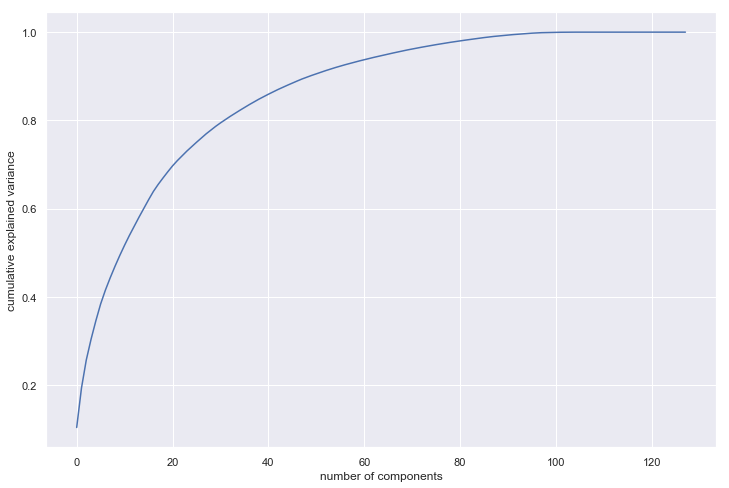

In [41]:
# plotting screeplot to check the no. of dimensions required
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

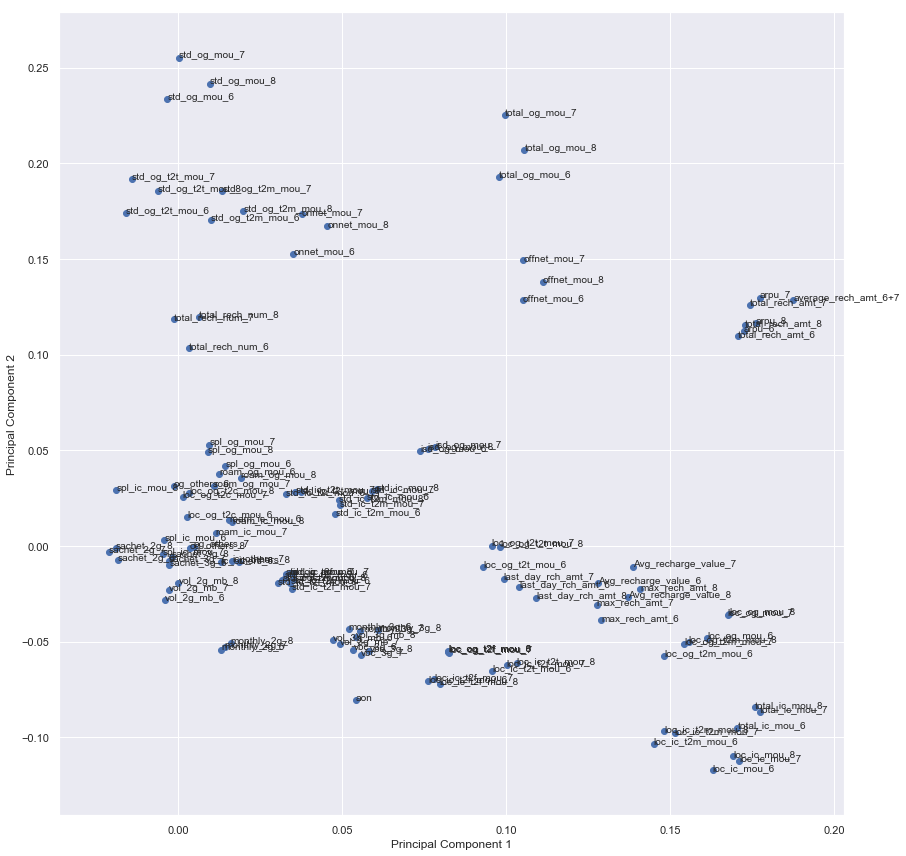

In [42]:
# Plotting 2 PCs
%matplotlib inline
fig = plt.figure(figsize = (12,12))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

### From the above analysis, its very clear that we need approx. 60 PCs to explain ~90% of the variance. Also, the first 2 PCA are very heavy on ARPU, total recharge amount, local usage and std usage. Hence, lets use incremental PCA on 60 components

In [43]:
#Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [44]:
df_train_pca = pca_final.fit_transform(dat2)
df_train_pca.shape

(19170, 60)

In [45]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

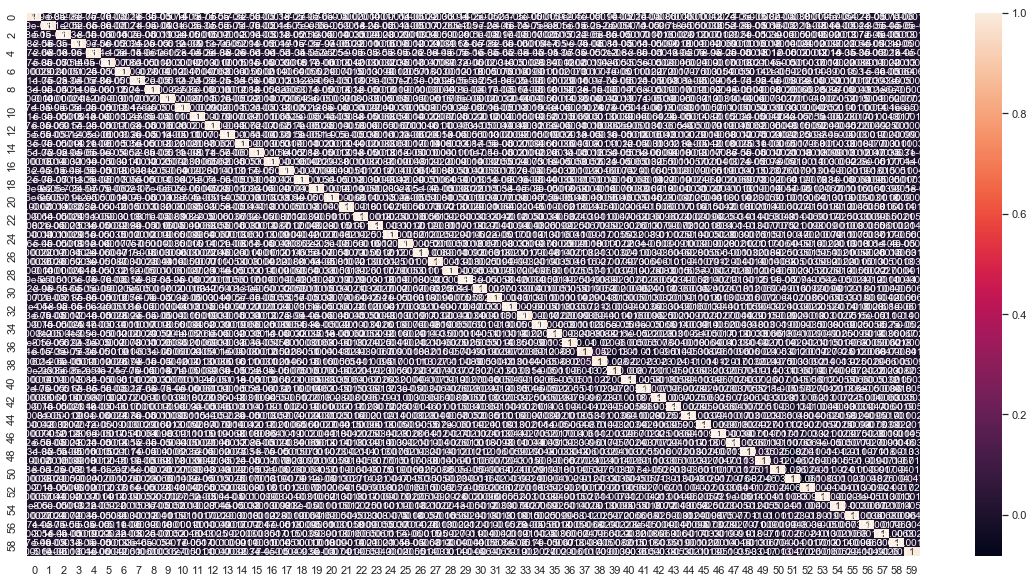

In [46]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [47]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0, hence we reduced the number of dimensions

max corr: 0.05203018126813191 , min corr:  -0.0824602959155805


### Part 3) Data Modelling using Random Forest

In [48]:
#Scaling & PCA on X_test data
dat2_test = standard_scaler.transform(X_test)
df_test_pca = pca_final.transform(dat2_test)

In [200]:
# GridSearchCV to find optimal max_depth
# We will use the metric "Recall" as it maximises the chance to predict 1 (Churn) correctly
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [201]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.346220       0.040557      0.013467         0.007284         
1  0.724470       0.104281      0.009519         0.001339         
2  0.629423       0.036005      0.008117         0.001783         
3  0.721021       0.101173      0.007343         0.001082         

  param_max_depth             params  split0_test_score  split1_test_score  \
0  2               {'max_depth': 2}   0.708955           0.746269            
1  7               {'max_depth': 7}   0.664179           0.597015            
2  12              {'max_depth': 12}  0.470149           0.417910            
3  17              {'max_depth': 17}  0.328358           0.335821            

   split2_test_score  split3_test_score       ...         mean_test_score  \
0  0.751880           0.759398                ...         0.731646          
1  0.616541           0.578947                ...         0.616152          
2  0.390977           0.375940                ...         0.400177          
3  0.375940           0.285714                ...         0.314798          

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0  0.026462        1                0.741088            0.791745             
1  0.028705        2                0.878049            0.893058             
2  0.042031        3                0.938086            0.921201             
3  0.043943        4                0.885553            0.909944             

   split2_train_score  split3_train_score  split4_train_score  \
0  0.756554            0.756554            0.758427             
1  0.880150            0.887640            0.893258             
2  0.913858            0.941948            0.919476             
3  0.906367            0.900749            0.872659             

   mean_train_score  std_train_score  
0  0.760874          0.016660         
1  0.886431          0.006352         
2  0.926914          0.011039         
3  0.895054          0.013956         

[4 rows x 21 columns]

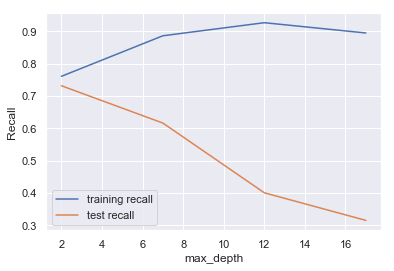

In [202]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [203]:
# GridSearchCV to find optimal n_estimators
# We will use the metric "Recall" as it maximises the chance to predict 1 (Churn) correctly


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model keeping max_depth = 2 from above model
rf = RandomForestClassifier(class_weight='balanced', max_depth=2)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [204]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  2.098869       0.131523      0.031012         0.001946         
1  11.444364      1.094772      0.169089         0.029399         
2  19.110521      1.897940      0.299950         0.069951         
3  26.173266      0.640851      0.378823         0.031581         

  param_n_estimators                  params  split0_test_score  \
0  100                {'n_estimators': 100}   0.746269            
1  500                {'n_estimators': 500}   0.768657            
2  900                {'n_estimators': 900}   0.761194            
3  1300               {'n_estimators': 1300}  0.768657            

   split1_test_score  split2_test_score  split3_test_score       ...         \
0  0.768657           0.812030           0.789474                ...          
1  0.753731           0.796992           0.774436                ...          
2  0.723881           0.804511           0.766917                ...          
3  0.723881           0.796992           0.774436                ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  0.770654         0.027596        2                0.810507             
1  0.773649         0.013913        1                0.812383             
2  0.769192         0.027501        3                0.814259             
3  0.769181         0.024565        4                0.823640             

   split1_train_score  split2_train_score  split3_train_score  \
0  0.827392            0.803371            0.790262             
1  0.808630            0.822097            0.814607             
2  0.827392            0.816479            0.807116             
3  0.827392            0.823970            0.808989             

   split4_train_score  mean_train_score  std_train_score  
0  0.782772            0.802861          0.015638         
1  0.807116            0.812967          0.005281         
2  0.801498            0.813349          0.008799         
3  0.808989            0.818596          0.007953         

[4 rows x 21 columns]

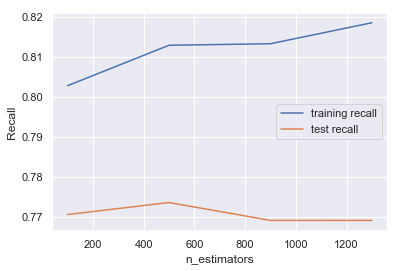

In [206]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [207]:
# GridSearchCV to find optimal min_samples_leaf


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [208]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.745928       0.123917      0.012062         0.004268         
1  0.689415       0.067012      0.008175         0.002040         
2  0.641420       0.099824      0.013273         0.008477         
3  0.526283       0.043368      0.008179         0.001164         
4  0.505006       0.021428      0.006780         0.001163         

  param_min_samples_leaf                     params  split0_test_score  \
0  100                    {'min_samples_leaf': 100}  0.708955            
1  150                    {'min_samples_leaf': 150}  0.746269            
2  200                    {'min_samples_leaf': 200}  0.701493            
3  250                    {'min_samples_leaf': 250}  0.738806            
4  300                    {'min_samples_leaf': 300}  0.731343            

   split1_test_score  split2_test_score  split3_test_score       ...         \
0  0.686567           0.751880           0.706767                ...          
1  0.686567           0.774436           0.736842                ...          
2  0.701493           0.759398           0.736842                ...          
3  0.686567           0.796992           0.759398                ...          
4  0.694030           0.774436           0.759398                ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  0.704669         0.027709        6                0.863039             
1  0.736189         0.028384        3                0.836773             
2  0.727210         0.022560        5                0.812383             
3  0.746724         0.035768        1                0.829268             
4  0.743716         0.028488        2                0.825516             

   split1_train_score  split2_train_score  split3_train_score  \
0  0.861163            0.848315            0.861423             
1  0.848030            0.837079            0.842697             
2  0.864916            0.822097            0.835206             
3  0.849906            0.848315            0.823970             
4  0.842402            0.827715            0.837079             

   split4_train_score  mean_train_score  std_train_score  
0  0.846442            0.856076          0.007156         
1  0.829588            0.838833          0.006202         
2  0.837079            0.834336          0.017749         
3  0.822097            0.834711          0.012000         
4  0.825843            0.831711          0.006810         

[5 rows x 21 columns]

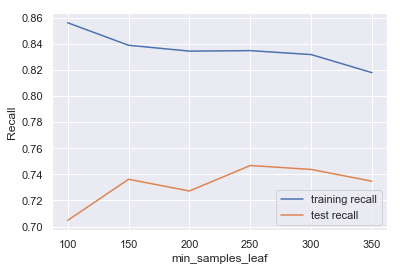

In [209]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [227]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [1,8,25,50]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 8, 25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [228]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.170485       0.018452      0.008965         0.000945         
1  0.826657       0.091314      0.008330         0.001319         
2  2.201918       0.073164      0.007069         0.000794         
3  4.544338       0.204932      0.007752         0.001888         

  param_max_features                params  split0_test_score  \
0  1                  {'max_features': 1}   0.007463            
1  8                  {'max_features': 8}   0.111940            
2  25                 {'max_features': 25}  0.074627            
3  50                 {'max_features': 50}  0.082090            

   split1_test_score  split2_test_score  split3_test_score       ...         \
0  0.022388           0.015038           0.007519                ...          
1  0.037313           0.060150           0.037594                ...          
2  0.089552           0.075188           0.067669                ...          
3  0.104478           0.075188           0.075188                ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  0.011986         0.005965        4                0.772983             
1  0.062936         0.027316        3                0.827392             
2  0.073439         0.009737        2                0.816135             
3  0.080925         0.012631        1                0.833021             

   split1_train_score  split2_train_score  split3_train_score  \
0  0.825516            0.833333            0.840824             
1  0.857411            0.818352            0.846442             
2  0.840525            0.850187            0.848315             
3  0.831144            0.825843            0.837079             

   split4_train_score  mean_train_score  std_train_score  
0  0.822097            0.818951          0.023880         
1  0.853933            0.840706          0.015257         
2  0.867041            0.844441          0.016585         
3  0.855805            0.836578          0.010270         

[4 rows x 21 columns]

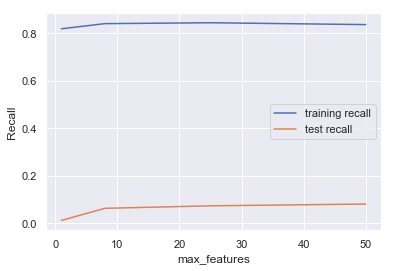

In [229]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [221]:
# GridSearchCV to find optimal min_samples_split


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 300, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(2, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [222]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.887454       0.067872      0.007751         0.000757         
1  0.931674       0.091868      0.009646         0.002162         
2  0.922635       0.104970      0.008335         0.002147         
3  0.898037       0.087205      0.007035         0.000386         
4  0.920128       0.084433      0.009044         0.001494         

  param_min_samples_split                      params  split0_test_score  \
0  2                       {'min_samples_split': 2}    0.007463            
1  52                      {'min_samples_split': 52}   0.000000            
2  102                     {'min_samples_split': 102}  0.000000            
3  152                     {'min_samples_split': 152}  0.000000            
4  202                     {'min_samples_split': 202}  0.000000            

   split1_test_score  split2_test_score  split3_test_score       ...         \
0  0.059701           0.022556           0.022556                ...          
1  0.000000           0.000000           0.022556                ...          
2  0.000000           0.000000           0.000000                ...          
3  0.000000           0.000000           0.000000                ...          
4  0.000000           0.000000           0.000000                ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  0.026968         0.017382        1                0.827392             
1  0.010524         0.013109        2                0.075047             
2  0.000000         0.000000        3                0.016886             
3  0.000000         0.000000        3                0.005629             
4  0.000000         0.000000        3                0.001876             

   split1_train_score  split2_train_score  split3_train_score  \
0  0.827392            0.848315            0.831461             
1  0.065666            0.050562            0.059925             
2  0.018762            0.009363            0.007491             
3  0.013133            0.003745            0.001873             
4  0.009381            0.007491            0.000000             

   split4_train_score  mean_train_score  std_train_score  
0  0.878277            0.842567          0.019453         
1  0.091760            0.068592          0.014051         
2  0.003745            0.011249          0.005696         
3  0.000000            0.004876          0.004535         
4  0.000000            0.003750          0.003933         

[5 rows x 21 columns]

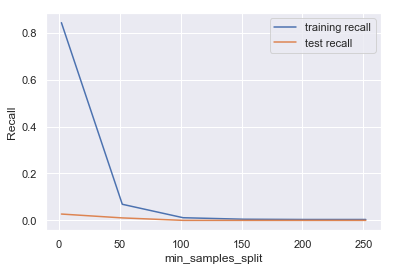

In [223]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [230]:
# Creating a Random Forest model for the classification and using balanced class weight to deal with class imbalance
# Exclusing max_features and min_samples_split as they have negligible impact on y_train recall as seen above
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [2,5,10],
    'min_samples_leaf': [150, 250, 350],
    'n_estimators': [200, 300, 500, 800], 
    
}
# Create the model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 11.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [150, 250, 350], 'n_estimators': [200, 300, 500, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [231]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.9034950443401147 using {'max_depth': 10, 'min_samples_leaf': 150, 'n_estimators': 800}


In [232]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced',bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=150,                                                         
                             n_estimators=800)
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=150,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [233]:
# predict on Test data
predictions = rfc.predict(df_test_pca)

In [234]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [235]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95      7976
          1       0.17      0.62      0.27       241

avg / total       0.96      0.90      0.93      8217



In [105]:
print(confusion_matrix(y_test,predictions))

[[7318  658]
 [  99  142]]


#### Since, the import metric is to predict the churn accurately, therefore sensitivity or recall is the best measure. From the above model, we get a very high precision score on test data which is 62%. Hence, this is a very good model for prediction

### Part 4) Logistic Regression to get an understanding of driver variables

In [56]:
#Scaling the train data
X_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), columns = X_train.columns)
X_train_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.421132 -0.719429 -0.982251  1.074079    -0.001469    -0.540420      
1 -0.361548  0.815940  1.554366 -0.462153    -0.234657    -0.037651      
2 -1.209498  0.180269  0.211893 -0.654215    -0.568490    -0.423589      
3 -0.223327 -0.115443  0.223171 -0.002327     0.034001     0.193766      
4 -0.091869  0.033252 -0.517630 -0.431526    -0.202059    -0.524372      

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0 -0.753152     -0.712209     -0.808029     -0.224880        
1 -0.510204      0.097172      0.901816     -0.224880        
2 -0.822678      0.999250      1.291350     -0.153815        
3 -0.478320     -0.315238     -0.052686      1.842613        
4  1.528442      2.265191      0.200563     -0.224880        

           ...           sachet_3g_7  sachet_3g_8       aon  vbc_3g_8  \
0          ...          -0.161528    -0.148948    -0.155732 -0.332965   
1          ...          -0.161528    -0.148948     1.148062 -0.332965   
2          ...          -0.161528    -0.148948    -0.731207 -0.332965   
3          ...          -0.161528    -0.148948    -0.421415 -0.332965   
4          ...          -0.161528     0.828570    -0.613240 -0.082678   

   vbc_3g_7  vbc_3g_6  average_rech_amt_6+7  Avg_recharge_value_6  \
0 -0.332575 -0.312387 -0.620443             -0.663676               
1 -0.332575 -0.312387  0.297309              1.219711               
2 -0.192599 -0.312387 -0.540041             -0.842566               
3 -0.332575 -0.312387 -0.141957             -0.121964               
4  0.676050  0.653846 -0.128230              0.180610               

   Avg_recharge_value_7  Avg_recharge_value_8  
0 -0.634025             -0.781439              
1  3.210297              4.500791              
2 -0.324678             -0.375679              
3 -0.077592             -0.040834              
4  0.539144             -0.181631              

[5 rows x 128 columns]

In [57]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [58]:
# Import RFE and select 20 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)  
rfe = rfe.fit(X_train_scaled, y_train)

In [59]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 53),
 ('arpu_7', False, 42),
 ('arpu_8', False, 6),
 ('onnet_mou_6', False, 25),
 ('onnet_mou_7', False, 63),
 ('onnet_mou_8', False, 24),
 ('offnet_mou_6', False, 99),
 ('offnet_mou_7', False, 45),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 64),
 ('roam_ic_mou_7', False, 27),
 ('roam_ic_mou_8', False, 5),
 ('roam_og_mou_6', False, 67),
 ('roam_og_mou_7', False, 98),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 66),
 ('loc_og_t2t_mou_7', False, 65),
 ('loc_og_t2t_mou_8', False, 44),
 ('loc_og_t2m_mou_6', False, 77),
 ('loc_og_t2m_mou_7', False, 43),
 ('loc_og_t2m_mou_8', False, 60),
 ('loc_og_t2f_mou_6', False, 74),
 ('loc_og_t2f_mou_7', False, 49),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 103),
 ('loc_og_t2c_mou_7', False, 100),
 ('loc_og_t2c_mou_8', False, 33),
 ('loc_og_mou_6', False, 104),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', False, 59),
 ('std_og_t2t_mou_6', False, 61),
 ('std_og_t2t_mou_7', False, 62),
 ('std

In [60]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train_scaled.columns[rfe.support_]
X_train_scaled = X_train_scaled[col]
X_train_scaled.head()

offnet_mou_8  roam_og_mou_8  loc_og_t2f_mou_8  loc_og_mou_7  \
0 -0.808029     -0.182023      -0.312341         -0.757468       
1  0.901816     -0.203973       17.022817         0.809005       
2  1.291350     -0.203973      -0.312341         -0.545313       
3 -0.052686      6.665873      -0.312341         -0.765120       
4  0.200563      0.200865      -0.065896         -0.374064       

   std_og_t2t_mou_8  std_og_mou_8  isd_og_mou_6  isd_og_mou_8  og_others_7  \
0 -0.381762         -0.548918     -0.039199     -0.040315     -0.024354      
1 -0.429647         -0.474464     -0.039199     -0.040315     -0.024354      
2 -0.297289          0.958130     -0.039199     -0.040315     -0.024354      
3 -0.429647         -0.595279     -0.039199     -0.040315     -0.024354      
4 -0.385355          0.077495     -0.039199     -0.040315     -0.024354      

   og_others_8  total_og_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0 -0.017543    -0.597959       -0.413005         -0.730811           
1 -0.017543    -0.069815        0.630278          0.315675           
2 -0.017543     0.347301       -0.371823         -0.566734           
3 -0.017543    -1.015561       -0.435815         -0.738661           
4 -0.017543     1.484842       -0.410909          0.608935           

   loc_ic_t2f_mou_8  loc_ic_mou_8  ic_others_8  total_rech_num_8  \
0 -0.357155         -0.779217     -0.094130    -0.403538           
1  3.395849          1.012856     -0.094130    -0.824597           
2 -0.357155         -0.641951     -0.094130     0.543847           
3 -0.357155         -0.796611     -0.094130    -0.193008           
4  0.369878          0.266786     -0.062634    -0.508803           

   last_day_rch_amt_8  monthly_3g_8  vbc_3g_8  
0 -0.460830           -0.295707     -0.332965  
1  2.943998           -0.295707     -0.332965  
2  0.228941           -0.295707     -0.332965  
3  0.008801           -0.295707     -0.332965  
4  0.221603           -0.295707     -0.082678

In [61]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_scaled)
y_train = list(y_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19149
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 09 May 2019   Deviance:                          nan
Time:                        15:37:47   Pearson chi2:                 2.28e+05
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -94.3290   8440.077     -0.011      0.991   -1.66e+04    1.64e+04
offnet_mou_8          -1.2324      0.292     -4.224      0.000      -1.804      -0.661
roam_og_mou_8          0.4468      0.050      8.941      0.000       0.349       0.545
loc_og_t2f_mou_8      -1.1037      0.421     -2.619      0.009      -1.930      -0.278
loc_og_mou_7          -0.4329      0.117     -3.700      0.000      -0.662      -0.204
std_og_t2t_mou_8      -1.1450      0.289     -3.966      0.000      -1.711      -0.579
std_og_mou_8           1.1156      0.415      2.691      0.007       0.303       1.928
isd_og_mou_6           0.0333      0.199      0.167      0.867      -0.357       0.423
isd_og_mou_8          -0.4144      0.600     -0.690      0.490      -1.591       0.762
og_others_7           -0.3964      1.706     -0.232      0.816      -3.740       2.947
og_others_8        -5021.7378   4.81e+05     -0.010      0.992   -9.48e+05    9.38e+05
total_og_mou_7         0.3841      0.052      7.428      0.000       0.283       0.485
loc_ic_t2t_mou_8    1.005e+04   1409.485      7.129      0.000    7285.574    1.28e+04
loc_ic_t2m_mou_8    1.365e+04   1914.992      7.129      0.000    9898.023    1.74e+04
loc_ic_t2f_mou_8    2633.3878    369.480      7.127      0.000    1909.221    3357.555
loc_ic_mou_8       -1.934e+04   2712.459     -7.130      0.000   -2.47e+04    -1.4e+04
ic_others_8           -1.9333      0.853     -2.265      0.023      -3.606      -0.261
total_rech_num_8      -0.5604      0.083     -6.756      0.000      -0.723      -0.398
last_day_rch_amt_8    -0.4525      0.098     -4.614      0.000      -0.645      -0.260
monthly_3g_8          -0.7717      0.201     -3.842      0.000      -1.165      -0.378
vbc_3g_8              -0.7864      0.185     -4.246      0.000      -1.149      -0.423
======================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present to check multi colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
14  loc_ic_mou_8        2.558855e+09
12  loc_ic_t2m_mou_8    1.275359e+09
11  loc_ic_t2t_mou_8    6.909031e+08
13  loc_ic_t2f_mou_8    4.746448e+07
5   std_og_mou_8        1.848000e+01
7   isd_og_mou_8        1.332000e+01
6   isd_og_mou_6        1.323000e+01
4   std_og_t2t_mou_8    8.750000e+00
0   offnet_mou_8        7.720000e+00
10  total_og_mou_7      3.390000e+00
3   loc_og_mou_7        2.820000e+00
18  monthly_3g_8        1.340000e+00
19  vbc_3g_8            1.340000e+00
16  total_rech_num_8    1.290000e+00
2   loc_og_t2f_mou_8    1.250000e+00
17  last_day_rch_amt_8  1.190000e+00
1   roam_og_mou_8       1.150000e+00
9   og_others_8         1.020000e+00
8   og_others_7         1.020000e+00
15  ic_others_8         1.010000e+00

In [63]:
#Dropping og_others_8 as it has high p-value
X_train_scaled.drop('og_others_8', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19150
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1958.8
Date:                Thu, 09 May 2019   Deviance:                       3917.6
Time:                        15:37:49   Pearson chi2:                 2.28e+05
No. Iterations:                    12   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.2540      0.206    -30.428      0.000      -6.657      -5.851
offnet_mou_8          -1.2292      0.291     -4.219      0.000      -1.800      -0.658
roam_og_mou_8          0.4451      0.050      8.951      0.000       0.348       0.543
loc_og_t2f_mou_8      -1.1442      0.425     -2.695      0.007      -1.976      -0.312
loc_og_mou_7          -0.4298      0.117     -3.683      0.000      -0.659      -0.201
std_og_t2t_mou_8      -1.1417      0.288     -3.959      0.000      -1.707      -0.576
std_og_mou_8           1.1118      0.414      2.685      0.007       0.300       1.923
isd_og_mou_6           0.0434      0.195      0.223      0.824      -0.339       0.425
isd_og_mou_8          -0.4944      0.640     -0.772      0.440      -1.749       0.760
og_others_7           -0.7491      1.686     -0.444      0.657      -4.054       2.556
total_og_mou_7         0.3824      0.052      7.398      0.000       0.281       0.484
loc_ic_t2t_mou_8    1.006e+04   1408.542      7.139      0.000    7295.583    1.28e+04
loc_ic_t2m_mou_8    1.366e+04   1913.709      7.139      0.000    9911.619    1.74e+04
loc_ic_t2f_mou_8    2635.5263    369.232      7.138      0.000    1911.844    3359.208
loc_ic_mou_8       -1.936e+04   2710.644     -7.140      0.000   -2.47e+04    -1.4e+04
ic_others_8           -1.9352      0.855     -2.263      0.024      -3.611      -0.259
total_rech_num_8      -0.5659      0.083     -6.819      0.000      -0.729      -0.403
last_day_rch_amt_8    -0.4507      0.098     -4.597      0.000      -0.643      -0.259
monthly_3g_8          -0.7708      0.201     -3.839      0.000      -1.164      -0.377
vbc_3g_8              -0.7829      0.185     -4.232      0.000      -1.146      -0.420
======================================================================================
"""

In [65]:
#Dropping og_others_7 as it has high p-value
X_train_scaled.drop('og_others_7', axis = 1, inplace = True)

In [66]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19151
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1960.7
Date:                Thu, 09 May 2019   Deviance:                       3921.3
Time:                        15:37:49   Pearson chi2:                 2.37e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.2416      0.203    -30.821      0.000      -6.638      -5.845
offnet_mou_8          -1.1598      0.287     -4.040      0.000      -1.723      -0.597
roam_og_mou_8          0.4308      0.049      8.808      0.000       0.335       0.527
loc_og_t2f_mou_8      -1.1687      0.427     -2.736      0.006      -2.006      -0.331
loc_og_mou_7          -0.4358      0.117     -3.715      0.000      -0.666      -0.206
std_og_t2t_mou_8      -1.0782      0.285     -3.786      0.000      -1.636      -0.520
std_og_mou_8           1.0131      0.408      2.482      0.013       0.213       1.813
isd_og_mou_6           0.0429      0.195      0.220      0.826      -0.339       0.425
isd_og_mou_8          -0.5009      0.638     -0.785      0.433      -1.752       0.750
total_og_mou_7         0.3843      0.052      7.436      0.000       0.283       0.486
loc_ic_t2t_mou_8    1.005e+04   1408.178      7.136      0.000    7289.068    1.28e+04
loc_ic_t2m_mou_8    1.365e+04   1913.215      7.136      0.000    9902.735    1.74e+04
loc_ic_t2f_mou_8    2633.6340    369.137      7.135      0.000    1910.139    3357.128
loc_ic_mou_8       -1.934e+04   2709.943     -7.137      0.000   -2.47e+04    -1.4e+04
ic_others_8           -1.9390      0.856     -2.265      0.023      -3.617      -0.261
total_rech_num_8      -0.5602      0.083     -6.773      0.000      -0.722      -0.398
last_day_rch_amt_8    -0.4433      0.098     -4.542      0.000      -0.635      -0.252
monthly_3g_8          -0.7608      0.200     -3.800      0.000      -1.153      -0.368
vbc_3g_8              -0.8192      0.192     -4.275      0.000      -1.195      -0.444
======================================================================================
"""

In [67]:
#Dropping isd_og_mou_6	 as it has high p-value
X_train_scaled.drop('isd_og_mou_6', axis = 1, inplace = True)

In [68]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19152
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1960.7
Date:                Thu, 09 May 2019   Deviance:                       3921.4
Time:                        15:37:49   Pearson chi2:                 2.37e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.2410      0.202    -30.824      0.000      -6.638      -5.844
offnet_mou_8          -1.1598      0.287     -4.040      0.000      -1.722      -0.597
roam_og_mou_8          0.4307      0.049      8.807      0.000       0.335       0.527
loc_og_t2f_mou_8      -1.1685      0.427     -2.734      0.006      -2.006      -0.331
loc_og_mou_7          -0.4357      0.117     -3.714      0.000      -0.666      -0.206
std_og_t2t_mou_8      -1.0781      0.285     -3.786      0.000      -1.636      -0.520
std_og_mou_8           1.0128      0.408      2.481      0.013       0.213       1.813
isd_og_mou_8          -0.4475      0.575     -0.778      0.436      -1.575       0.680
total_og_mou_7         0.3842      0.052      7.435      0.000       0.283       0.485
loc_ic_t2t_mou_8    1.005e+04   1408.122      7.138      0.000    7290.612    1.28e+04
loc_ic_t2m_mou_8    1.365e+04   1913.139      7.137      0.000    9904.833    1.74e+04
loc_ic_t2f_mou_8    2634.0102    369.122      7.136      0.000    1910.544    3357.476
loc_ic_mou_8       -1.934e+04   2709.836     -7.138      0.000   -2.47e+04    -1.4e+04
ic_others_8           -1.9381      0.856     -2.265      0.024      -3.615      -0.261
total_rech_num_8      -0.5604      0.083     -6.775      0.000      -0.722      -0.398
last_day_rch_amt_8    -0.4426      0.098     -4.539      0.000      -0.634      -0.252
monthly_3g_8          -0.7603      0.200     -3.797      0.000      -1.153      -0.368
vbc_3g_8              -0.8195      0.192     -4.276      0.000      -1.195      -0.444
======================================================================================
"""

In [69]:
#Dropping isd_og_mou_8	 as it has high p-value
X_train_scaled.drop('isd_og_mou_8', axis = 1, inplace = True)

In [70]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19153
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1961.2
Date:                Thu, 09 May 2019   Deviance:                       3922.3
Time:                        15:37:49   Pearson chi2:                 2.37e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.2338      0.202    -30.827      0.000      -6.630      -5.837
offnet_mou_8          -1.1814      0.286     -4.127      0.000      -1.742      -0.620
roam_og_mou_8          0.4346      0.049      8.921      0.000       0.339       0.530
loc_og_t2f_mou_8      -1.1771      0.428     -2.749      0.006      -2.016      -0.338
loc_og_mou_7          -0.4315      0.117     -3.697      0.000      -0.660      -0.203
std_og_t2t_mou_8      -1.0981      0.284     -3.867      0.000      -1.655      -0.541
std_og_mou_8           1.0467      0.407      2.574      0.010       0.250       1.844
total_og_mou_7         0.3844      0.052      7.440      0.000       0.283       0.486
loc_ic_t2t_mou_8    1.005e+04   1407.991      7.138      0.000    7290.469    1.28e+04
loc_ic_t2m_mou_8    1.365e+04   1912.961      7.138      0.000    9904.642    1.74e+04
loc_ic_t2f_mou_8    2633.9022    369.088      7.136      0.000    1910.504    3357.301
loc_ic_mou_8       -1.934e+04   2709.583     -7.139      0.000   -2.47e+04    -1.4e+04
ic_others_8           -1.9395      0.856     -2.266      0.023      -3.617      -0.262
total_rech_num_8      -0.5650      0.083     -6.836      0.000      -0.727      -0.403
last_day_rch_amt_8    -0.4487      0.097     -4.617      0.000      -0.639      -0.258
monthly_3g_8          -0.7594      0.200     -3.792      0.000      -1.152      -0.367
vbc_3g_8              -0.8185      0.192     -4.274      0.000      -1.194      -0.443
======================================================================================
"""

In [71]:
# Make a VIF dataframe for all the variables present to check multi colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF']/100, 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features          VIF
10  loc_ic_mou_8        25583662.88
8   loc_ic_t2m_mou_8    12751153.38
7   loc_ic_t2t_mou_8    6907712.60 
9   loc_ic_t2f_mou_8    474554.24  
5   std_og_mou_8        0.17       
4   std_og_t2t_mou_8    0.08       
0   offnet_mou_8        0.07       
3   loc_og_mou_7        0.03       
6   total_og_mou_7      0.03       
1   roam_og_mou_8       0.01       
2   loc_og_t2f_mou_8    0.01       
11  ic_others_8         0.01       
12  total_rech_num_8    0.01       
13  last_day_rch_amt_8  0.01       
14  monthly_3g_8        0.01       
15  vbc_3g_8            0.01

In [72]:
#Dropping loc_ic_mou_8 as it has high VIF
X_train_scaled.drop('loc_ic_mou_8', axis = 1, inplace = True)

In [73]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19154
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.1
Date:                Thu, 09 May 2019   Deviance:                       3976.2
Time:                        15:37:50   Pearson chi2:                 5.08e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.6436      0.215    -30.887      0.000      -7.065      -6.222
offnet_mou_8          -1.2694      0.287     -4.420      0.000      -1.832      -0.706
roam_og_mou_8          0.4620      0.048      9.587      0.000       0.368       0.556
loc_og_t2f_mou_8      -1.4189      0.455     -3.119      0.002      -2.310      -0.527
loc_og_mou_7          -0.4462      0.119     -3.752      0.000      -0.679      -0.213
std_og_t2t_mou_8      -1.1774      0.287     -4.108      0.000      -1.739      -0.616
std_og_mou_8           1.0958      0.409      2.678      0.007       0.294       1.898
total_og_mou_7         0.3953      0.051      7.763      0.000       0.296       0.495
loc_ic_t2t_mou_8      -1.3204      0.332     -3.977      0.000      -1.971      -0.670
loc_ic_t2m_mou_8      -2.3068      0.311     -7.416      0.000      -2.917      -1.697
loc_ic_t2f_mou_8      -1.0529      0.385     -2.734      0.006      -1.808      -0.298
ic_others_8           -2.2708      0.911     -2.493      0.013      -4.056      -0.485
total_rech_num_8      -0.5992      0.083     -7.218      0.000      -0.762      -0.436
last_day_rch_amt_8    -0.4774      0.097     -4.913      0.000      -0.668      -0.287
monthly_3g_8          -0.7596      0.200     -3.796      0.000      -1.152      -0.367
vbc_3g_8              -0.8556      0.194     -4.406      0.000      -1.236      -0.475
======================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present to check multi colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5   std_og_mou_8        16.85
4   std_og_t2t_mou_8    8.25 
0   offnet_mou_8        7.10 
6   total_og_mou_7      3.30 
3   loc_og_mou_7        2.67 
8   loc_ic_t2m_mou_8    1.40 
13  monthly_3g_8        1.34 
14  vbc_3g_8            1.34 
11  total_rech_num_8    1.29 
2   loc_og_t2f_mou_8    1.24 
9   loc_ic_t2f_mou_8    1.22 
12  last_day_rch_amt_8  1.19 
1   roam_og_mou_8       1.13 
7   loc_ic_t2t_mou_8    1.10 
10  ic_others_8         1.00

In [75]:
#Dropping std_og_mou_8 as it has high VIF
X_train_scaled.drop('std_og_mou_8', axis = 1, inplace = True)

In [76]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_scaled)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1= logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19170
Model:                            GLM   Df Residuals:                    19155
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1991.8
Date:                Thu, 09 May 2019   Deviance:                       3983.6
Time:                        15:37:50   Pearson chi2:                 5.16e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.6198      0.215    -30.752      0.000      -7.042      -6.198
offnet_mou_8          -0.5402      0.084     -6.457      0.000      -0.704      -0.376
roam_og_mou_8          0.3583      0.028     12.833      0.000       0.304       0.413
loc_og_t2f_mou_8      -1.5117      0.454     -3.331      0.001      -2.401      -0.622
loc_og_mou_7          -0.5430      0.122     -4.465      0.000      -0.781      -0.305
std_og_t2t_mou_8      -0.4378      0.075     -5.815      0.000      -0.585      -0.290
total_og_mou_7         0.4184      0.050      8.307      0.000       0.320       0.517
loc_ic_t2t_mou_8      -1.3000      0.332     -3.919      0.000      -1.950      -0.650
loc_ic_t2m_mou_8      -2.5291      0.304     -8.325      0.000      -3.125      -1.934
loc_ic_t2f_mou_8      -1.0745      0.391     -2.747      0.006      -1.841      -0.308
ic_others_8           -2.2666      0.911     -2.489      0.013      -4.051      -0.482
total_rech_num_8      -0.5896      0.083     -7.128      0.000      -0.752      -0.428
last_day_rch_amt_8    -0.4801      0.094     -5.083      0.000      -0.665      -0.295
monthly_3g_8          -0.7635      0.200     -3.810      0.000      -1.156      -0.371
vbc_3g_8              -0.8383      0.194     -4.324      0.000      -1.218      -0.458
======================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present to check multi colinearity

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5   total_og_mou_7      2.91
4   std_og_t2t_mou_8    1.96
0   offnet_mou_8        1.84
3   loc_og_mou_7        1.76
12  monthly_3g_8        1.34
13  vbc_3g_8            1.34
10  total_rech_num_8    1.29
7   loc_ic_t2m_mou_8    1.28
2   loc_og_t2f_mou_8    1.22
8   loc_ic_t2f_mou_8    1.22
11  last_day_rch_amt_8  1.18
6   loc_ic_t2t_mou_8    1.09
1   roam_og_mou_8       1.04
9   ic_others_8         1.00

In [78]:
vif = vif.sort_values(by = "Features", ascending = False)
vif

Features   VIF
13  vbc_3g_8            1.34
10  total_rech_num_8    1.29
5   total_og_mou_7      2.91
4   std_og_t2t_mou_8    1.96
1   roam_og_mou_8       1.04
0   offnet_mou_8        1.84
12  monthly_3g_8        1.34
2   loc_og_t2f_mou_8    1.22
3   loc_og_mou_7        1.76
6   loc_ic_t2t_mou_8    1.09
7   loc_ic_t2m_mou_8    1.28
8   loc_ic_t2f_mou_8    1.22
11  last_day_rch_amt_8  1.18
9   ic_others_8         1.00

#### Since both p-values and VIF is well within acceptable range, we can accept the above model. Next, we will predict using the above and look at the evaluation metrics

In [79]:
#Making predictions of y_train data
y_train_predict = res1.predict(X_train_sm)
y_train_predict

0        1.821743e-01
1        1.606272e-17
2        2.278537e-02
3        5.234574e-01
4        1.767927e-03
5        1.789082e-09
6        2.054062e-02
7        6.676776e-02
8        1.081389e-02
9        1.136740e-03
10       9.915156e-03
11       2.512433e-02
12       7.725277e-03
13       2.704197e-07
14       2.675271e-08
15       1.194551e-05
16       3.630308e-03
17       3.801551e-02
18       4.151020e-02
19       4.180016e-08
20       4.823926e-02
21       1.070004e-03
22       3.829780e-06
23       1.064169e-09
24       2.859658e-02
25       5.546117e-08
26       1.470208e-04
27       9.998768e-02
28       2.154783e-03
29       6.987798e-02
30       5.409465e-02
31       2.389198e-43
32       7.842430e-02
33       2.382563e-02
34       8.494284e-05
35       1.052529e-08
36       1.808745e-05
37       1.441624e-06
38       5.542156e-03
39       3.164351e-02
40       2.258908e-04
41       6.189914e-04
42       7.606127e-03
43       1.231662e-03
44       7.851911e-05
45       1

In [80]:
# Reshaping it into an array

y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([1.82174301e-01, 1.60627195e-17, 2.27853733e-02, 5.23457402e-01,
       1.76792663e-03, 1.78908197e-09, 2.05406209e-02, 6.67677564e-02,
       1.08138942e-02, 1.13674016e-03])

In [81]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Churn':y_train[:], 'Churn_Prob':y_train_predict})
y_train_pred_final.head()

Churn    Churn_Prob
0  0      1.821743e-01
1  0      1.606272e-17
2  0      2.278537e-02
3  1      5.234574e-01
4  0      1.767927e-03

In [82]:
# Creating new columns 'predicted' if P > 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final

Churn    Churn_Prob  Predicted
0      0      1.821743e-01  0        
1      0      1.606272e-17  0        
2      0      2.278537e-02  0        
3      1      5.234574e-01  1        
4      0      1.767927e-03  0        
5      0      1.789082e-09  0        
6      0      2.054062e-02  0        
7      0      6.676776e-02  0        
8      0      1.081389e-02  0        
9      0      1.136740e-03  0        
10     0      9.915156e-03  0        
11     0      2.512433e-02  0        
12     0      7.725277e-03  0        
13     0      2.704197e-07  0        
14     0      2.675271e-08  0        
15     0      1.194551e-05  0        
16     0      3.630308e-03  0        
17     0      3.801551e-02  0        
18     0      4.151020e-02  0        
19     0      4.180016e-08  0        
20     0      4.823926e-02  0        
21     0      1.070004e-03  0        
22     0      3.829780e-06  0        
23     0      1.064169e-09  0        
24     0      2.859658e-02  0        
25     0      5.546117e-08  0        
26     0      1.470208e-04  0        
27     0      9.998768e-02  0        
28     0      2.154783e-03  0        
29     0      6.987798e-02  0        
30     0      5.409465e-02  0        
31     0      2.389198e-43  0        
32     0      7.842430e-02  0        
33     0      2.382563e-02  0        
34     0      8.494284e-05  0        
35     0      1.052529e-08  0        
36     0      1.808745e-05  0        
37     0      1.441624e-06  0        
38     0      5.542156e-03  0        
39     0      3.164351e-02  0        
40     0      2.258908e-04  0        
41     0      6.189914e-04  0        
42     0      7.606127e-03  0        
43     0      1.231662e-03  0        
44     0      7.851911e-05  0        
45     0      1.992844e-01  0        
46     1      9.492248e-02  0        
47     0      8.572428e-09  0        
48     0      4.052878e-03  0        
49     0      4.564776e-03  0        
50     0      1.775001e-09  0        
51     0      5.768714e-03  0        
52     0      3.775509e-03  0        
53     0      1.879670e-03  0        
54     0      9.546270e-02  0        
55     0      1.574402e-01  0        
56     0      2.739985e-03  0        
57     0      1.310000e-01  0        
58     0      1.299622e-06  0        
59     0      6.582071e-03  0        
60     0      8.363050e-04  0        
61     0      1.958615e-02  0        
62     0      1.105537e-07  0        
63     0      1.410898e-02  0        
64     0      2.880421e-02  0        
65     0      3.135310e-02  0        
66     0      1.480062e-03  0        
67     0      8.209475e-06  0        
68     0      8.951819e-05  0        
69     0      3.261113e-03  0        
70     0      5.564989e-02  0        
71     0      1.208600e-02  0        
72     0      8.274304e-02  0        
73     0      1.420695e-04  0        
74     0      6.395506e-04  0        
75     0      3.203579e-03  0        
76     0      5.003875e-06  0        
77     0      1.077497e-05  0        
78     1      3.122389e-02  0        
79     0      3.606017e-02  0        
80     0      1.731633e-03  0        
81     0      5.358498e-04  0        
82     0      6.438779e-02  0        
83     0      6.496677e-03  0        
84     0      7.340735e-03  0        
85     0      3.239617e-05  0        
86     0      3.413737e-05  0        
87     1      2.755911e-01  0        
88     0      6.937944e-03  0        
89     0      2.069762e-05  0        
90     0      8.457291e-06  0        
91     0      6.507767e-02  0        
92     0      1.394742e-03  0        
93     0      1.449641e-02  0        
94     0      4.678133e-03  0        
95     0      1.224734e-01  0        
96     0      1.318844e-01  0        
97     0      9.545904e-02  0        
98     0      5.433397e-02  0        
99     0      4.638348e-02  0        
100    0      1.390733e-02  0        
101    0      4.719556e-05  0        
102    0      2.256407e-02  0        
103    0      9.097297e-06  0        
104    0      1.0

In [83]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[18471    32]
 [  647    20]]


In [84]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.9645800730307773


In [85]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calculate the sensitivity

TP/(TP+FN)

0.029985007496251874

In [87]:
# Calculate the specificity

TN/(TN+FP)

0.9982705507215046

#### Since the model is not giving a very high score on sensitivity, we need to look at the optimal probablity cut off point and improve the model

In [88]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn    Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0  0      1.821743e-01  0          1    1    0    0    0    0    0    0     
1  0      1.606272e-17  0          1    0    0    0    0    0    0    0     
2  0      2.278537e-02  0          1    0    0    0    0    0    0    0     
3  1      5.234574e-01  1          1    1    1    1    1    1    0    0     
4  0      1.767927e-03  0          1    0    0    0    0    0    0    0     

   0.8  0.9  
0  0    0    
1  0    0    
2  0    0    
3  0    0    
4  0    0

In [89]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.034794  1.000000  0.000000
0.1  0.1   0.915545  0.710645  0.922931
0.2  0.2   0.954512  0.545727  0.969248
0.3  0.3   0.962076  0.217391  0.988921
0.4  0.4   0.964163  0.077961  0.996109
0.5  0.5   0.964580  0.029985  0.998271
0.6  0.6   0.964789  0.011994  0.999135
0.7  0.7   0.965102  0.010495  0.999514
0.8  0.8   0.965258  0.007496  0.999784
0.9  0.9   0.965363  0.004498  1.000000


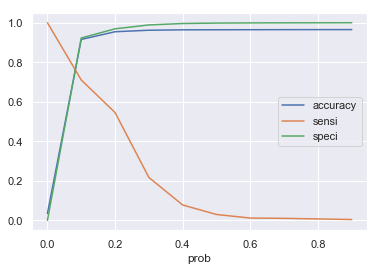

In [90]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### so, for probability with 0.1 cut off we get optimum scores for sensitivity. Hence, lets use this cut off for the final model

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

# Let's see the head
y_train_pred_final

Churn    Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0      1.821743e-01  0          1    1    0    0    0    0    0    0     
1      0      1.606272e-17  0          1    0    0    0    0    0    0    0     
2      0      2.278537e-02  0          1    0    0    0    0    0    0    0     
3      1      5.234574e-01  1          1    1    1    1    1    1    0    0     
4      0      1.767927e-03  0          1    0    0    0    0    0    0    0     
5      0      1.789082e-09  0          1    0    0    0    0    0    0    0     
6      0      2.054062e-02  0          1    0    0    0    0    0    0    0     
7      0      6.676776e-02  0          1    0    0    0    0    0    0    0     
8      0      1.081389e-02  0          1    0    0    0    0    0    0    0     
9      0      1.136740e-03  0          1    0    0    0    0    0    0    0     
10     0      9.915156e-03  0          1    0    0    0    0    0    0    0     
11     0      2.512433e-02  0          1    0    0    0    0    0    0    0     
12     0      7.725277e-03  0          1    0    0    0    0    0    0    0     
13     0      2.704197e-07  0          1    0    0    0    0    0    0    0     
14     0      2.675271e-08  0          1    0    0    0    0    0    0    0     
15     0      1.194551e-05  0          1    0    0    0    0    0    0    0     
16     0      3.630308e-03  0          1    0    0    0    0    0    0    0     
17     0      3.801551e-02  0          1    0    0    0    0    0    0    0     
18     0      4.151020e-02  0          1    0    0    0    0    0    0    0     
19     0      4.180016e-08  0          1    0    0    0    0    0    0    0     
20     0      4.823926e-02  0          1    0    0    0    0    0    0    0     
21     0      1.070004e-03  0          1    0    0    0    0    0    0    0     
22     0      3.829780e-06  0          1    0    0    0    0    0    0    0     
23     0      1.064169e-09  0          1    0    0    0    0    0    0    0     
24     0      2.859658e-02  0          1    0    0    0    0    0    0    0     
25     0      5.546117e-08  0          1    0    0    0    0    0    0    0     
26     0      1.470208e-04  0          1    0    0    0    0    0    0    0     
27     0      9.998768e-02  0          1    0    0    0    0    0    0    0     
28     0      2.154783e-03  0          1    0    0    0    0    0    0    0     
29     0      6.987798e-02  0          1    0    0    0    0    0    0    0     
30     0      5.409465e-02  0          1    0    0    0    0    0    0    0     
31     0      2.389198e-43  0          1    0    0    0    0    0    0    0     
32     0      7.842430e-02  0          1    0    0    0    0    0    0    0     
33     0      2.382563e-02  0          1    0    0    0    0    0    0    0     
34     0      8.494284e-05  0          1    0    0    0    0    0    0    0     
35     0      1.052529e-08  0          1    0    0    0    0    0    0    0     
36     0      1.808745e-05  0          1    0    0    0    0    0    0    0     
37     0      1.441624e-06  0          1    0    0    0    0    0    0    0     
38     0      5.542156e-03  0          1    0    0    0    0    0    0    0     
39     0      3.164351e-02  0          1    0    0    0    0    0    0    0     
40     0      2.258908e-04  0          1    0    0    0    0    0    0    0     
41     0      6.189914e-04  0          1    0    0    0    0    0    0    0     
42     0      7.606127e-03  0          1    0    0    0    0    0    0    0     
43     0      1.231662e-03  0          1    0    0    0    0    0    0    0     
44     0      7.851911e-05  0          1    0    0    0    0    0    0    0     
45     0      1.992844e-01  0          1    1    0    0    0    0    0    0     
46     1      9.492248e-02  0          1    0    0    0    0    0    0    0     
47     0      8.572428e-09  0          1    0    0    0    0    0    0    0     
48     0      4.052878e-03  0         

In [92]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

0.9155451225873761


In [93]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
print(confusion2)

[[17077  1426]
 [  193   474]]


In [94]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Calculate Sensitivity

TP/(TP+FN)

0.7106446776611695

In [96]:
# Calculate Specificity

TN/(TN+FP)

0.9229314165270497

In [97]:
# ROC curve


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

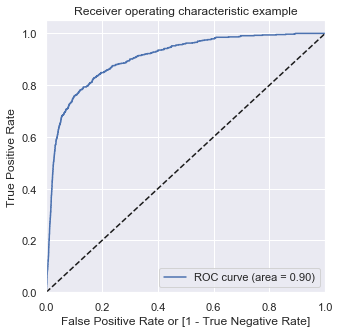

In [174]:
# Call the ROC function

draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### We get an AUC of 90% which represents a very good model

In [175]:
#Scaling the Test data
col = X_train_scaled.columns
X_test_1 = X_test[col]
X_test_scaled = pd.DataFrame(standard_scaler.transform(X_test_1), columns = col)
X_test_scaled.head()

offnet_mou_8  roam_og_mou_8  loc_og_t2f_mou_8  loc_og_mou_7  \
0 -0.788966     -0.115263      -0.372367         -0.773213       
1 -0.683594     -0.208674      -0.372367         -0.679905       
2 -0.233953      0.764980       0.251041         -0.242643       
3 -0.544477     -0.208674      -0.372367         -0.433599       
4 -0.317804     -0.208674      -0.344079         -0.399282       

   std_og_t2t_mou_8  total_og_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0 -0.451456         -1.070850       -0.437889         -0.728125           
1  0.990277         -0.185668       -0.245483         -0.294322           
2 -0.435888         -0.657845       -0.332403         -0.309476           
3  1.877515          0.987323       -0.286622         -0.448201           
4 -0.451456         -0.842701       -0.258836          0.159362           

   loc_ic_t2f_mou_8  ic_others_8  total_rech_num_8  last_day_rch_amt_8  \
0 -0.327892         -0.114467    -0.816859         -0.668515             
1 -0.327892         -0.114467     1.534450         -0.601832             
2 -0.279787         -0.114467    -0.175593          0.198361             
3 -0.312922         -0.114467     0.038162         -0.335101             
4 -0.270406         -0.114467     0.145040         -0.335101             

   monthly_3g_8  vbc_3g_8  
0 -0.312488     -0.360528  
1 -0.312488     -0.360528  
2  3.136424      1.980082  
3 -0.312488     -0.360528  
4  1.411968      0.923011

In [176]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_scaled)
X_test_sm.head()


const  offnet_mou_8  roam_og_mou_8  loc_og_t2f_mou_8  loc_og_mou_7  \
0  1.0   -0.788966     -0.115263      -0.372367         -0.773213       
1  1.0   -0.683594     -0.208674      -0.372367         -0.679905       
2  1.0   -0.233953      0.764980       0.251041         -0.242643       
3  1.0   -0.544477     -0.208674      -0.372367         -0.433599       
4  1.0   -0.317804     -0.208674      -0.344079         -0.399282       

   std_og_t2t_mou_8  total_og_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0 -0.451456         -1.070850       -0.437889         -0.728125           
1  0.990277         -0.185668       -0.245483         -0.294322           
2 -0.435888         -0.657845       -0.332403         -0.309476           
3  1.877515          0.987323       -0.286622         -0.448201           
4 -0.451456         -0.842701       -0.258836          0.159362           

   loc_ic_t2f_mou_8  ic_others_8  total_rech_num_8  last_day_rch_amt_8  \
0 -0.327892         -0.114467    -0.816859         -0.668515             
1 -0.327892         -0.114467     1.534450         -0.601832             
2 -0.279787         -0.114467    -0.175593          0.198361             
3 -0.312922         -0.114467     0.038162         -0.335101             
4 -0.270406         -0.114467     0.145040         -0.335101             

   monthly_3g_8  vbc_3g_8  
0 -0.312488     -0.360528  
1 -0.312488     -0.360528  
2  3.136424      1.980082  
3 -0.312488     -0.360528  
4  1.411968      0.923011

In [177]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res1.predict(X_test_sm)

In [178]:
# Converting y_test_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [179]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [180]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
# Check 'y_pred_final'

y_pred_final.head()

Churn         0
0  1      0.242952
1  0      0.013333
2  0      0.000147
3  0      0.038057
4  0      0.000721

In [183]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Churn_Prob'})

In [184]:
# Let's see the head of y_pred_final

y_pred_final.head()

Churn  Churn_Prob
0  1      0.242952  
1  0      0.013333  
2  0      0.000147  
3  0      0.038057  
4  0      0.000721

In [185]:
# Make predictions on the test set using 0.1 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [186]:
# Check y_pred_final

y_pred_final.head()

Churn  Churn_Prob  final_predicted
0  1      0.242952    1              
1  0      0.013333    0              
2  0      0.000147    0              
3  0      0.038057    0              
4  0      0.000721    0

In [187]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Churn'], y_pred_final.final_predicted)

0.9070220275039552

In [188]:
confusion3 = metrics.confusion_matrix(y_pred_final['Churn'], y_pred_final.final_predicted )
confusion3

array([[7281,  695],
       [  69,  172]], dtype=int64)

In [189]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [190]:
# Calculate sensitivity
TP / float(TP+FN)

0.7136929460580913

In [191]:
# Calculate specificity
TN / float(TN+FP)

0.9128635907723169

#### From the above analysis we can clearly see that the model returns overall accuracy of 91% and sensitivity of 71%, which is very close to the Training observations. Hence, we can use this model to understand the drivers

### Part 5) Understanding key drivers and recommendations

In [192]:
# Key driver variables
X_test_scaled.columns

Index(['offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_7',
       'std_og_t2t_mou_8', 'total_og_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_3g_8', 'vbc_3g_8'],
      dtype='object')

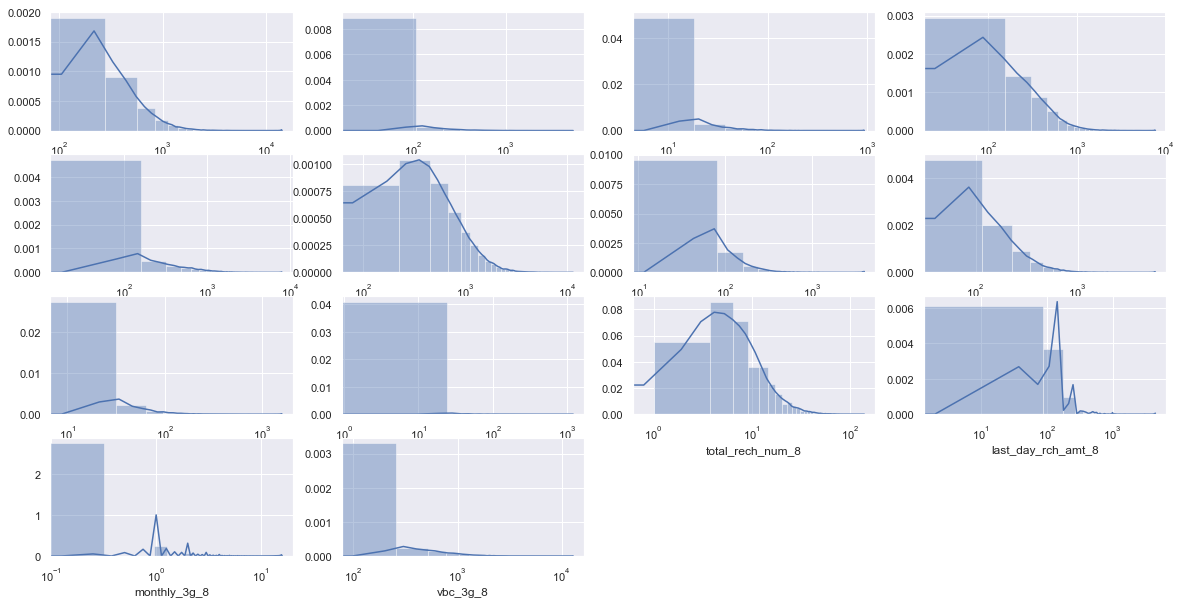

In [193]:
# Plotting the above important variables
plt.figure(figsize=(20,10))
plt.subplot(4,4,1)
sns.distplot(data_final['offnet_mou_8'])
plt.xscale('log')
plt.subplot(4,4,2)
sns.distplot(data_final['roam_og_mou_8'])
plt.xscale('log')
plt.subplot(4,4,3)
sns.distplot(data_final['loc_og_t2f_mou_8'])
plt.xscale('log')
plt.subplot(4,4,4)
sns.distplot(data_final['loc_og_mou_7'])
plt.xscale('log')
plt.subplot(4,4,5)
sns.distplot(data_final['std_og_t2t_mou_8'])
plt.xscale('log')
plt.subplot(4,4,6)
sns.distplot(data_final['total_og_mou_7'])
plt.xscale('log')
plt.subplot(4,4,7)
sns.distplot(data_final['loc_ic_t2t_mou_8'])
plt.xscale('log')
plt.subplot(4,4,8)
sns.distplot(data_final['loc_ic_t2m_mou_8'])
plt.xscale('log')
plt.subplot(4,4,9)
sns.distplot(data_final['loc_ic_t2f_mou_8'])
plt.xscale('log')
plt.subplot(4,4,10)
sns.distplot(data_final['ic_others_8'])
plt.xscale('log')
plt.subplot(4,4,11)
sns.distplot(data_final['total_rech_num_8'])
plt.xscale('log')
plt.subplot(4,4,12)
sns.distplot(data_final['last_day_rch_amt_8'])
plt.xscale('log')
plt.subplot(4,4,13)
sns.distplot(data_final['monthly_3g_8'])
plt.xscale('log')
plt.subplot(4,4,14)
sns.distplot(data_final['vbc_3g_8'])
plt.xscale('log')

### From the above, we can club the key drivers as follows: 1) local MOU - both incoming and outgoing, 2)  Roaming outgoing, 3) Offnet, 4) STD outgoing, 5) Total recharge amount, 6) 3G internet usage - both monthly and vbc & 7) Last day recharge amount
    

#### Based on the above some strategies to retain these high value customers are:
         1) Monitor the local minutes of usage - if the usage is going down, incentivuse the customer by offering free minutes, etc. 
         2) STD/Roaming outgoing - reduce the roaming/STD rates or offer more attractive packages such as extra talktime
         3) Offnet - attractive/discounted schemes to make calls within the network
         4) Total recharge amount - add bonus recharge for every 100 INR spent
         5) 3G internet usage - offer priority service, ensure stability and reliability of services, incentiise to move to higher bandwidth e.g. 4G. Lure VBC customers to prepaid network by offering attractive schemes on joining such as free minutes of usage, etc.
         6) LAst day recharge amount - if the next recharge amount is lower than the previous one, immediately call the customer to understand reasons and offer schemes to increase recharge